# <font color='DarkGreen'>Rafael Cavaletti Maia</font>
# <font color='DarkGreen'>Big Data Real-Time Analytics com Python e Spark - Data Science Academy</font>

## <font color='DarkGreen'>Projeto com Feedback 03 - Prevendo Nível de Satisfação dos Clientes do Santander</font>

www.datascienceacademy.com.br

## <font color='DarkBlue'> Parte 1 - Análise Exploratória e Limpeza dos Dados</font>
## Parte 2 - Feature Engineering
## Parte 3 - Machine Learning

## Descrição
O seguinte projeto faz parte do curso <b>Big Data Real-Time Analytics com Python e Spark</b>, presente na <b>Formação Cientista de Dados</b> da <b>Data Science Academy</b>.
<br>
<br>
O <font color = 'Red'><b>Santander</font></b> é uma instituição bancária com origem em 1857 na província de Santander (atualmente Cantábria), na Espanha. Conta atualmente com mais de 36,2 milhões de clientes e está presente em grande parte da América Latina, América do Norte, alguns países da África e na Europa. 
<br>
(**Fonte:** https://pt.wikipedia.org/wiki/Grupo_Santander)
<br>
<br>
O objetivo do projeto é identificar clientes insatisfeitos no início do relacionamento, permitindo a adoção de medidas proativas por parte do Santander para que não ocorra a perda de seus clientes.

## Base de dados
A base de dados pode ser encontrada na plataforma Kaggle através do link: https://www.kaggle.com/c/santander-customer-satisfaction

## Referências
Como inspiração e referência para nortear as etapas de Análise Exploratória e Feature Engineering, além das aulas da Data Science Academy, foram utilizadas as seguintes fontes:
- https://towardsdatascience.com/santander-customer-satisfaction-a-self-case-study-using-python-5776d3f8b060
- https://michael-fuchs-python.netlify.app/2019/08/20/dealing-with-outliers/
- https://michael-fuchs-python.netlify.app/2019/08/09/dealing-with-constant-and-duplicate-features/
- https://michael-fuchs-python.netlify.app/2019/07/28/dealing-with-highly-correlated-features/

## Versões utilizadas

In [1]:
# Versão da linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


## Pacotes utilizados

In [2]:
#!pip install -q -U watermark

In [3]:
# Imports
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import skew
from itertools import combinations 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Versão dos pacotes
%reload_ext watermark
%watermark -a "Rafael Cavaletti Maia" --iversions

Author: Rafael Cavaletti Maia

matplotlib: 3.5.1
numpy     : 1.21.5
pandas    : 1.4.2
joblib    : 1.1.0
scipy     : 1.7.3
seaborn   : 0.11.2



## Carregando os dados
Foram fornecidos dois datasets, um com os dados de treino (contendo a variável target), e outro com os dados de teste (sem a variável target). Iremos fazer a análise exploratória inicialmente no dataset com os dados de treino.

In [5]:
# Carregando os dados
df_treino = pd.read_csv('dados/train.csv')
df_teste = pd.read_csv('dados/test.csv')

## Definindo funções
<br>
As funções utilizadas com mais frequência para visualização dos dados estão definidas abaixo junto com uma breve explicação.

In [6]:
def countplot_target(df ,h=500,size=(5,5)):
    """
    Mostra a distribuição da variável TARGET do dataset
    junto com a porcentagem em cima das barras, além de imprimir
    a quantidade de clientes satisfeitos e insatisfeitos
    
    Parâmetros:
    df: o dataframe utilizado
    h : altura adicional do texto em cima da barra
    size : dimensões da plotagem
    """
    
    #Configuração da área de plotagem e da figura
    sns.set(palette='bright',style='darkgrid')
    plt.figure(figsize=size)
    
    # Preparação das variáveis a serem utilizadas no loop
    x = list(df['TARGET'].unique())
    y = list(df['TARGET'].value_counts())
    total = df.shape[0]
    ax = sns.countplot(x = 'TARGET', data = df)
    patches = ax.patches
    
    # Loop para obter a porcentagem que cada barra representa.
    # As instruções para obter a porcentagem foram baseadas em 
    # https://www.tutorialspoint.com/how-to-add-percentages-on-top-of-bars-in-seaborn-using-matplotlib
    for p in range(len(patches)):
        height = patches[p].get_height()
        x = patches[p].get_x() + patches[p].get_width()/2
        y = patches[p].get_height()+500
        ax.annotate('{:.2f}%'.format(height*100/total), (x, y), ha='center')
    
    # Titulo e obtenção da quantidade de clientes satisfeitos e insatisfeitos
    plt.title("Distribuição da variável TARGET no dataset de treino")
    target_1 = df_treino[df_treino['TARGET']==1].shape[0]
    target_0 = df_treino[df_treino['TARGET']==0].shape[0]
    
    # Print dos resultados e visualização da figura
    print("A quantidade de clientes insatisfeitos é %i."%(target_1))
    print("A quantidade de clientes satisfeitos é %i."%(target_0))
    print('\n')
    plt.show()

In [7]:
def histplot_duplo(var, df1 = df_treino, df2= df_teste, size = (20,5), bins = 20, kde = False):
    """
    Cria um histplot para o dataset de treino e o dataset
    de teste para uma variável selecionada
    Parâmetros:
    var: variável a ser plotada
    df1: o dataframe de treino
    df2: o dataframe de teste
    size: tamanho da plotagem
    bins: quantidade de bins
    kde: estimativa da função densidade
    """

    # Lista dos dataframes utilizados
    lista = [df1, df2]
    
    # Definição das dimensões da figura
    plt.figure(figsize = size)
    
    # Loop para a plotagem
    for elemento in lista:
        for i in range(0,2):
            
            # Preparação da área de plotagem
            plt.subplot(1, 2, i+1)
            
            # Plotagem do elemento
            sns.histplot(x = lista[i][var], kde = kde, color = 'green', bins = bins)
            
            # Títulos
            plt.title(f'Distribuição de {var} no dataset de {"treino" if i == 0 else "teste"}')
            plt.ylabel('Ocorrências')
            plt.xlabel(var)

In [8]:
def valuecounts_duplo(var, df1 = df_treino, df2 = df_teste, size = (15,6)):
    """
    Cria um plot de valuecounts para o dataset de treino e o dataset
    de teste para uma variável selecionada
    Parâmetros:
    var: variável a ser plotada
    df1: o dataframe de treino
    df2: o dataframe de teste
    size: tamanho da plotagem
    bins: quantidade de bins
    kde: estimativa da função densidade
    """
    
    # Lista com os dataframes
    lista = [df1, df2]
    
    # Definição das dimensões da figura
    plt.figure(figsize = size)
    
    # Loop para a plotagem
    for elemento in lista:
        for i in range(0,2):
            
            # Preparação da área de plotagem
            plt.subplot(1, 2, i+1)
            
            # Obtenção do dataframe com os valores da variável
            df = df1[var].value_counts().sort_index() if i == 0 else df2[var].value_counts().sort_index()
            
            # Plotagem do elemento
            sns.lineplot(x=df.index,y=df.values)
            
            # Títulos
            plt.title("Frequência de '%s' no dataset de treino"%(var))
            plt.ylabel('Frequência');
            
    plt.tight_layout()
    plt.show()
    
    # Print dos resumos
    print("-"*100)
    print("Porcentagem das 5 maiores frequências de '%s' no dataset de treino:"%(var))
    print("Valor\t Frequencia%")
    print((df1[var].value_counts()*100/df1[var].shape[0]).iloc[:5])
    print("-"*100)
    print("Porcentagem das 5 menores frequências de '%s' no dataset de treino:"%(var))
    print("Valor\t Frequencia%")
    print((df1[var].value_counts()*100/df1[var].shape[0]).iloc[-5:])

    print("-"*100)
    print("Porcentagem das 5 maiores frequencias de '%s' no dataset de teste:"%(var))
    print("Valor\t Frequencia%")
    print((df2[var].value_counts()*100/df2[var].shape[0]).iloc[:5])
    print("-"*100)
    print("Porcentagem das 5 maiores frequencias de '%s' no dataset de teste:"%(var))
    print("Valor\t Frequencia%")
    print((df2[var].value_counts()*100/df2[var].shape[0]).iloc[-5:])

In [9]:
def aplicar_log_sem_zero(var, df1, df2):
    
    """
    Aplica distribuição logaritmica em uma variável sem
    incluir os valores 0
    Parâmetros:
    var: variável a ser preenchida
    df1: o dataframe de treino
    df2: o dataframe de teste
    """
    df_var_log_treino = df1[df1[var]!=0].copy()
    df_var_log_treino.loc[df_var_log_treino[var]!=0, var] = np.log(df_var_log_treino.loc[df_var_log_treino[var]!=0, var])
    
    df_var_log_teste = df2[df2[var]!=0].copy()
    df_var_log_teste.loc[df_var_log_teste[var]!=0, var] = np.log(df_var_log_teste.loc[df_var_log_teste[var]!=0, var])
    
    return(df_var_log_treino, df_var_log_teste)
    

In [10]:
def aplicar_log_com_zero(var, df1, df2):
    """
    Aplica distribuição logaritmica em uma variável
    incluindo os valores 0
    Parâmetros:
    var: variável a ser preenchida
    df1: o dataframe de treino
    df2: o dataframe de teste
    """
    df_var_log_treino_0 = df1.copy()
    df_var_log_treino_0.loc[df_var_log_treino_0[var]!=0,var] = np.log(df_var_log_treino_0.loc[df_var_log_treino_0[var]!=0, var])
    
    df_var_log_teste_0 = df2.copy()
    df_var_log_teste_0.loc[df_var_log_teste_0[var]!=0, var] = np.log(df_var_log_teste_0.loc[df_var_log_teste_0[var]!=0, var])
    
    return(df_var_log_treino_0, df_var_log_teste_0)

In [11]:
def outliers_z_score(df):
    """
    Retorna as colunas e linhas que contém outliers
    Parâmetros:
    df: dataframe a ser analisado
    """
    desvios = 3

    media = np.mean(df)
    desvio_padrao = np.std(df)
    z_scores = [(y - media) / desvio_padrao for y in df]
    return np.where(np.abs(z_scores) > desvios)

## Análise Exploratória

In [12]:
# Shape do dataset
print(f'O dataset de treino possui {df_treino.shape[0]} linhas e {df_treino.shape[1]} colunas.')
print(f'O dataset de teste possui {df_teste.shape[0]} linhas e {df_teste.shape[1]} colunas.')

O dataset de treino possui 76020 linhas e 371 colunas.
O dataset de teste possui 75818 linhas e 370 colunas.


### Primeiras informações dos datasets

In [13]:
# Visualizando o dataset de treino
df_treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [14]:
# Visualizando o dataset de teste
df_teste.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [15]:
# Tipos das variáveis do dataset de treino
df_treino.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [16]:
# Tipos das variáveis do dataset de teste
df_teste.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace2    float64
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
Length: 370, dtype: object

### Tipos de variáveis

In [17]:
# Checando se há algum registro nulo
print('Registros nulos no dataset de treino:', df_treino.isnull().any().sum())
print('\nRegistros nulos no dataset de teste:', df_teste.isnull().any().sum())

Registros nulos no dataset de treino: 0

Registros nulos no dataset de teste: 0


### Separação de variáveis categóricas e numéricas

Queremos ver quais colunas estão no formato numérico e quais estão no formato categórico. Iremos fazer as análises no dataset de treino, e aplicar os tratamentos em ambos os datasets.
<br>
Como temos 371 colunas, deveremos encontrar um meio de automatizar essa análise.

In [18]:
# Contando a quantidade de variáveis numéricas
qtd = [var for var in df_treino.columns if (is_numeric_dtype(df_treino[var]) == True)]

print('A quantidade de variáveis numéricas é:', len(qtd))

print(100*'-')

if len(qtd) == df_treino.shape[1]:
        print('\nConclusão: todas as variáveis são numéricas pois sua quantidade é igual ao número de colunas')
else:
    print('\nConclusão: Existem variáveis categóricas, pois a quantidade de variáveis numéricas é diferente do número de colunas')

A quantidade de variáveis numéricas é: 371
----------------------------------------------------------------------------------------------------

Conclusão: todas as variáveis são numéricas pois sua quantidade é igual ao número de colunas


### Explorando as variáveis numéricas

In [19]:
df_treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


### Verificando e tratando variáveis constantes

Variáveis (colunas) constantes (variância = 0) não nos dão nenhuma informação, portanto, iremos removê-las do nosso DataFrame.

In [20]:
# Verificando o número de colunas totais do Dataset antes da limpeza
colunas_antes_remocao = df_treino.shape[1]
print('A quantidade de colunas antes da remoção de colunas constantes é:', colunas_antes_remocao)

A quantidade de colunas antes da remoção de colunas constantes é: 371


In [21]:
# Instanciando o nosso objeto de filtragem
filtro_constante = VarianceThreshold(threshold=0)

In [22]:
# Aplicando o filtro em nosso DataSet
filtro_constante.fit(df_treino)

VarianceThreshold(threshold=0)

In [23]:
# Quantidade de variáveis que não são constantes
len(df_treino.columns[filtro_constante.get_support()])

337

In [24]:
# Quantidade de variáveis que são constantes
cols_constantes = [coluna for coluna in df_treino.columns if coluna not in df_treino.columns[filtro_constante.get_support()]]
print('A quantidade de colunas constantes é: ', len(cols_constantes))

A quantidade de colunas constantes é:  34


In [25]:
# Print de quais são as colunas constantes
for i in cols_constantes:
    print(i)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [26]:
# As colunas constantes deverão ser removidas
colunas_constantes_remover = [elemento.strip() for elemento in cols_constantes]

In [27]:
# Colunas a serem removidas
colunas_constantes_remover

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [28]:
# Remoção das colunas constantes dos datasets de treino e teste
df_treino = df_treino.drop(colunas_constantes_remover, axis = 1)
df_teste = df_teste.drop(colunas_constantes_remover, axis = 1)

In [29]:
# Observando o novo shape
colunas_apos_remocao_treino = df_treino.shape[1]
colunas_apos_remocao_teste = df_teste.shape[1]

print('A quantidade de colunas do dataset de treino após a remoção das colunas constantes é:', colunas_apos_remocao_treino)
print('\nA quantidade de colunas do dataset de teste após a remoção das colunas constantes é:', colunas_apos_remocao_teste)
print(f'\nForam removidas {len(cols_constantes)} colunas.')

A quantidade de colunas do dataset de treino após a remoção das colunas constantes é: 337

A quantidade de colunas do dataset de teste após a remoção das colunas constantes é: 336

Foram removidas 34 colunas.


### Verificando e tratando colunas duplicadas
Iremos agora fazer a remoção de colunas duplicadas em nosso DataFrame, caso elas existam. Colunas duplicadas não possuem necessariamente os mesmos nomes, mas sim os mesmos valores.

In [30]:
# Obtendo a transposta de nosso DataFrame
df_treino_transposta = df_treino.T
df_treino_transposta.shape

(337, 76020)

In [31]:
# Obtendo o número de entradas duplicadas
print('O número de entradas duplicadas é:', df_treino_transposta.duplicated().sum())

O número de entradas duplicadas é: 29


In [32]:
# Obtendo as variáveis que serão mantidas
variaveis_unicas = df_treino_transposta.drop_duplicates(keep = 'first').T
variaveis_unicas.shape

(76020, 308)

In [33]:
# Lista de variáveis duplicadas para remover
variaveis_duplicadas = [dup for dup in df_treino.columns if dup not in variaveis_unicas]

# Vendo quais colunas estão duplicadas
for i in variaveis_duplicadas:
    print(i)

ind_var13_medio
ind_var18
ind_var26
ind_var25
ind_var29_0
ind_var29
ind_var32
ind_var34
ind_var37
ind_var39
num_var13_medio
num_var18
num_var26
num_var25
num_var29_0
num_var29
num_var32
num_var34
num_var37
num_var39
saldo_var29
delta_num_reemb_var13_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_in_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_in_1y3
delta_num_trasp_var33_out_1y3
saldo_medio_var13_medio_ult1


In [34]:
# Remoção das colunas duplicadas
df_treino = df_treino.drop(variaveis_duplicadas, axis = 1)
df_teste= df_teste.drop(variaveis_duplicadas, axis = 1)

# Novo shape do DataFrame
print(f'Após a remoção das colunas duplicadas o dataset de treino contém {df_treino.shape[0]} linhas e {df_treino.shape[1]} colunas.')
print(f'\nApós a remoção das colunas duplicadas o dataset de teste contém {df_teste.shape[0]} linhas e {df_teste.shape[1]} colunas.')

Após a remoção das colunas duplicadas o dataset de treino contém 76020 linhas e 308 colunas.

Após a remoção das colunas duplicadas o dataset de teste contém 75818 linhas e 307 colunas.


### Verificando e tratando colunas esparsas
A condição utilizada é a de que se uma coluna tem 99% de seus valores como 0, ela é esparsa e não fornece informação relevante.

In [35]:
# Obtendo a lista de colunas esparsas
colunas_esparsas = [i for i in df_treino.columns[1:-1] if np.percentile(df_treino[i],99)==0]

In [36]:
# Retirando as colunas esparças dos datasets
df_treino = df_treino.drop(colunas_esparsas, axis = 1)
df_teste = df_teste.drop(colunas_esparsas, axis = 1)

In [37]:
# Vendo o novo shape dos datasets
print(f'O dataset de treino após a remoção das colunas esparsas possui {df_treino.shape[0]} linhas e {df_treino.shape[1]} colunas')
print(f'\nO dataset de teste após a remoção das colunas esparsas possui {df_teste.shape[0]} linhas e {df_teste.shape[1]} colunas')

O dataset de treino após a remoção das colunas esparsas possui 76020 linhas e 143 colunas

O dataset de teste após a remoção das colunas esparsas possui 75818 linhas e 142 colunas


In [38]:
# Checando se algum registro ficou nulo durante o tratamento
print('Registros nulos no dataset de treino:', df_treino.isnull().any().sum())
print('\nRegistros nulos no dataset de teste:', df_teste.isnull().any().sum())

Registros nulos no dataset de treino: 0

Registros nulos no dataset de teste: 0


### Analisando as variáveis

<b>TARGET</b>
<br>
<br>
A variável TARGET representa os clientes que estão satisfeitos / insatisfeitos. O valor 0 representa os satisfeitos, e o valor 1 representa os insatisfeitos.
<br>
O gráfico abaixo revela que essa variável está fortemente desbalanceada.
<br>

A quantidade de clientes insatisfeitos é 3008.
A quantidade de clientes satisfeitos é 73012.




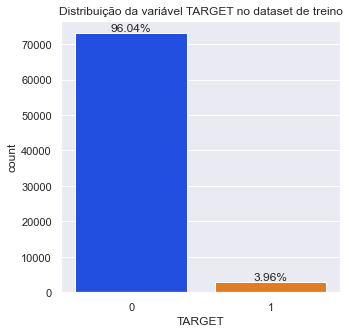

In [39]:
# Plotagem da variável TARGET
countplot_target(df_treino)

<font color = 'DarkBlue'>**Conclusão:**</font> A variável TARGET apresenta um grande desbalanceamento. Esse problema precisará ser resolvido quando formos formular o modelo preditivo.

<b>var3</b>
<br>
<br>
Pela busca através do fórum de discussão do Kaggle, foi indicado que essa variável pode representar a região ou nacionalidade do cliente.

In [40]:
# Checando o número de regiões
print('O número de regiões é:', len(df_treino['var3'].unique()))

O número de regiões é: 208


In [41]:
# Checando as regiões
np.array(sorted(df_treino['var3'].unique()))

array([-999999,       0,       1,       2,       3,       4,       5,
             6,       7,       8,       9,      10,      11,      12,
            13,      14,      15,      16,      17,      18,      19,
            20,      21,      22,      23,      24,      25,      26,
            27,      28,      29,      30,      31,      32,      33,
            34,      35,      36,      38,      40,      41,      42,
            43,      44,      45,      46,      47,      48,      49,
            50,      51,      52,      53,      54,      55,      56,
            57,      58,      59,      60,      61,      62,      63,
            64,      65,      66,      68,      69,      71,      72,
            73,      74,      76,      77,      78,      79,      81,
            82,      84,      85,      86,      87,      88,      89,
            90,      91,      93,      94,      95,      96,      97,
            98,      99,     100,     101,     102,     103,     104,
           105,     

Observamos que existe um valor -999999. Esse valor pode indicar um erro ou um valor ausente. Vamos ver qual é a sua frequência e, caso seja baixa, substituir pelo valor que aparece mais vezes (moda)

In [42]:
# Quantidade de vezes que o -999999 aparece
qtd_treino = list(df_treino['var3']).count(-999999)
qtd_teste = list(df_teste['var3']).count(-999999)

print(f'O valor -999999 aparece {qtd_treino} vezes no dataset de treino')
print(f'\nO valor -999999 aparece {qtd_teste} vezes no dataset de teste')

O valor -999999 aparece 116 vezes no dataset de treino

O valor -999999 aparece 120 vezes no dataset de teste


In [43]:
# Quantidade de elementos 
total_linhas_treino = df_treino.shape[0]
total_linhas_teste = df_teste.shape[0]

print('O total de linhas no dataset de treino é:', total_linhas_treino)
print('\nO total de linhas no dataset de teste é:', total_linhas_teste)

O total de linhas no dataset de treino é: 76020

O total de linhas no dataset de teste é: 75818


In [44]:
# Frequência do valor -999999
freq_extremo_treino = qtd_treino*100/total_linhas_treino
freq_extremo_teste = qtd_teste*100/total_linhas_teste
print('A frequência que o -999999 aparece no dataset de treino é %.3f%%'%(freq_extremo_treino))
print('\nA frequência que o -999999 aparece no dataset de teste é %.3f%%'%(freq_extremo_teste))

A frequência que o -999999 aparece no dataset de treino é 0.153%

A frequência que o -999999 aparece no dataset de teste é 0.158%


In [45]:
# Elemento com maior frequencia no dataset de treino
df_treino['var3'].value_counts() # o elemento é o 2

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [46]:
# Elemento com maior frequencia no dataset de teste
df_teste['var3'].value_counts() # o elemento é o 2

 2         73962
-999999      120
 8           116
 9           108
 13          107
           ...  
 113           1
 220           1
 199           1
 101           1
 225           1
Name: var3, Length: 199, dtype: int64

In [47]:
# Quantidade de vezes que o valor 2 aparece
qtd_treino_2 = list(df_treino['var3']).count(2)
qtd_teste_2 = list(df_teste['var3']).count(2)

print(f'O valor 2 aparece {qtd_treino_2} vezes no dataset de treino')
print(f'\nO valor 2 aparece {qtd_teste_2} vezes no dataset de teste')

O valor 2 aparece 74165 vezes no dataset de treino

O valor 2 aparece 73962 vezes no dataset de teste


In [48]:
# Frequência do valor 2
freq_2_treino = qtd_treino_2*100/total_linhas_treino
freq_2_teste = qtd_teste_2*100/total_linhas_teste
print('A frequência que o valor 2 aparece no dataset de treino é %.3f%%'%(freq_2_treino))
print('\nA frequência que o valor 2 aparece no dataset de teste é %.3f%%'%(freq_2_teste))

A frequência que o valor 2 aparece no dataset de treino é 97.560%

A frequência que o valor 2 aparece no dataset de teste é 97.552%


In [49]:
# Substituindo o valor -999999 por 2
df_treino['var3'].replace(-999999,2,inplace=True)
df_teste['var3'].replace(-999999,2,inplace=True)

In [50]:
# Checando a substituição
np.array(sorted(df_treino['var3'].unique()))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        68,  69,  71,  72,  73,  74,  76,  77,  78,  79,  81,  82,  84,
        85,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

<font color = 'DarkBlue'>**Conclusão**:</font> A variável **var3** está relacionada com a região. O valor -999999 foi substituído por 2, que era o valor de maior frequência.

<b>var15</b>
<br>
<br>
A consulta no fórum de discussão do Kaggle inferiu que a <b>var15</b> está relacionada com a idade.

In [51]:
# Checando os valores mínimos e máximos
print(f'O valor mínimo da var15 no dataset de treino é {df_treino["var15"].min()} e o máximo é {df_treino["var15"].max()}')
print(f'O valor máximo da var15 no dataset de teste é {df_teste["var15"].min()} e o máximo é {df_teste["var15"].max()}')

O valor mínimo da var15 no dataset de treino é 5 e o máximo é 105
O valor máximo da var15 no dataset de teste é 5 e o máximo é 105


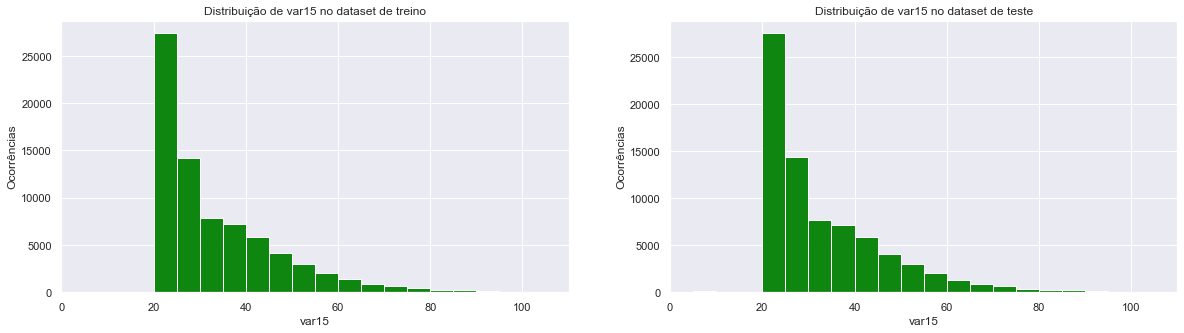

In [52]:
# Plotagem da distribuição de var15 nos datasets de treino e teste
histplot_duplo('var15')

A distribuição está bem similar nos dois datasets. Vamos analisar qual a maior faixa etária presente.

In [53]:
# Percentil da idade 30 anos nos datasets de treino e teste
percentil_30_treino = round(stats.percentileofscore(df_treino['var15'].values,30), 2)
percentil_30_teste = round(stats.percentileofscore(df_teste['var15'].values,30), 2)

print(f'A porcentagem do dataset de treino de pessoas até 30 anos é de {percentil_30_treino}% \
e as idades vão de {df_treino["var15"].min()} até {df_treino["var15"].max()} anos.')

print(f'\nA porcentagem do dataset de teste de pessoas até 30 anos é de {percentil_30_teste}% \
e as idades vão de {df_teste["var15"].min()} até {df_teste["var15"].max()} anos.')

A porcentagem do dataset de treino de pessoas até 30 anos é de 56.15% e as idades vão de 5 até 105 anos.

A porcentagem do dataset de teste de pessoas até 30 anos é de 56.58% e as idades vão de 5 até 105 anos.


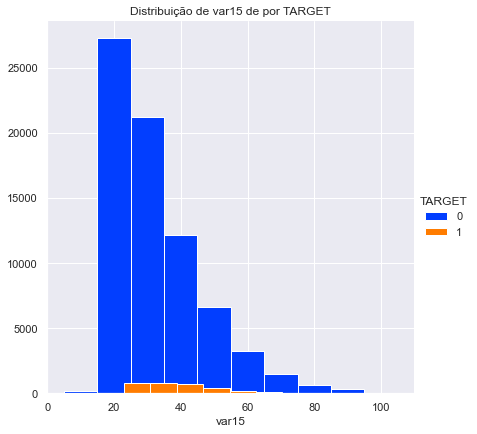

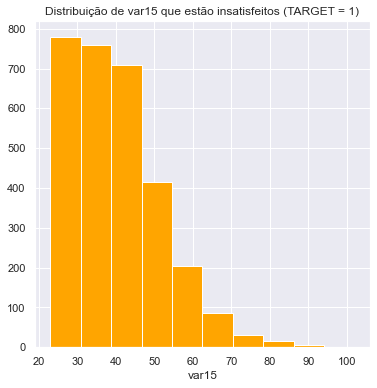

A idade mínima de clientes satisfeitos é 5 e a máxima é 105

A idade mínima de clientes insatisfeitos é 23 e a máxima é 102


In [54]:
# Distribuição das idades de acordo com a variável TARGET
sns.FacetGrid(data=df_treino,hue='TARGET',height=6).map(plt.hist,'var15').add_legend()
plt.title("Distribuição de var15 de por TARGET")
plt.show()

target_1 = df_treino[(df_treino['TARGET'] == 1)]
target_0 = df_treino[(df_treino['TARGET'] == 0)]
plt.figure(figsize = (6,6))
plt.hist(target_1['var15'], color = 'orange')
plt.title('Distribuição de var15 que estão insatisfeitos (TARGET = 1)')
plt.xlabel('var15')
plt.show()

# Idades mínimas e máximas em cada TARGET
idade_minima_target1 = target_1['var15'].min()
idade_maxima_target1 = target_1['var15'].max()
idade_minima_target0 = target_0['var15'].min()
idade_maxima_target0 = target_0['var15'].max()

print(f'A idade mínima de clientes satisfeitos é {idade_minima_target0} e a máxima é {idade_maxima_target0}')
print(f'\nA idade mínima de clientes insatisfeitos é {idade_minima_target1} e a máxima é {idade_maxima_target1}')

<font color = 'DarkBlue'>**Conclusão**:</font> a variável **var15** é a idade. Nenhum tratamento foi realizado nessa etapa. Pode-se notar pela distribuição que a maior quantidade de clientes satisfeitos e insatisfeitos está na faixa dos 20-30 anos, sendo que a distribuição para os clientes insatisfeitos tem maior concentração no range 23-50 anos.

<b>var38</b>
<br>
<br>
Pela discussão no fórum do Kaggle, foi possível inferir que a variável <b>var38</b> refere-se à hipoteca.

In [55]:
# Checando os valores mínimos e máximos de var38 nos datasets
print(f'O valor mínimo de var38 no dataset de treino é {df_treino["var38"].min()} e o máximo é {df_treino["var38"].max()}')
print(f'\nO valor mínimo de var38 no dataset de teste é {df_teste["var38"].min()} e o máximo é {df_teste["var38"].max()}')

O valor mínimo de var38 no dataset de treino é 5163.75 e o máximo é 22034738.76

O valor mínimo de var38 no dataset de teste é 1202.73 e o máximo é 28894395.51


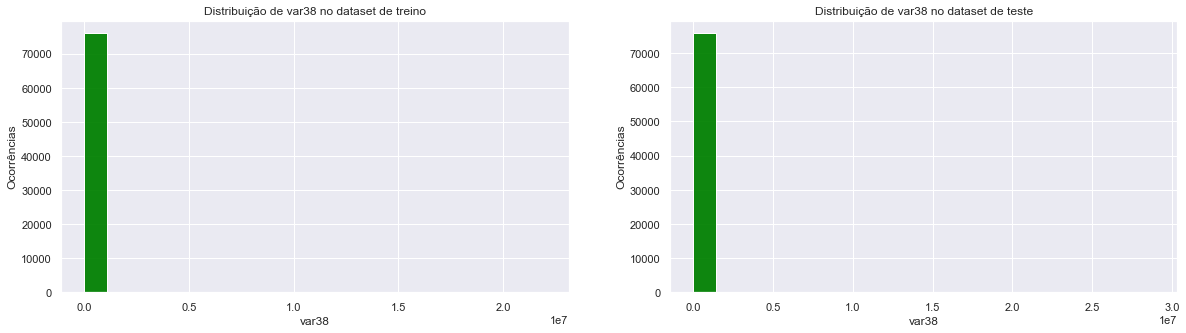

In [56]:
# Plot da distribuição dos valores de var38
histplot_duplo('var38')

Pelos plots acima não é possível obter muita informação devido a alta frequencia de algum determinado valor. Precisamos fazer uma análise mais aprofundada.

In [57]:
# Obtendo um resumo dos valores e suas respectivas frequências
print("-"*100)
print("5 valores que mais aparecem de '%s' no dataset de treino:"%('var38'))
print("Valor\t\t Frequencia")
print((df_treino['var38'].value_counts()).iloc[:5])
print("-"*100)
print("5 valores que menos aparecem de '%s' no dataset de treino:"%('var38'))
print("Valor\t Frequencia")
print((df_treino['var38'].value_counts()).iloc[-5:])

print("-"*100)
print("5 valores que mais aparecem de '%s' no dataset de teste:"%('var38'))
print("Valor\t\t Frequencia")
print((df_teste['var38'].value_counts()).iloc[:5])
print("-"*100)
print("5 valores que menos aparecem de '%s' no dataset de teste:"%('var38'))
print("Valor\t Frequencia")
print((df_teste['var38'].value_counts()).iloc[-5:])

----------------------------------------------------------------------------------------------------
5 valores que mais aparecem de 'var38' no dataset de treino:
Valor		 Frequencia
117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
Name: var38, dtype: int64
----------------------------------------------------------------------------------------------------
5 valores que menos aparecem de 'var38' no dataset de treino:
Valor	 Frequencia
89665.50     1
45876.57     1
151505.64    1
74548.17     1
84278.16     1
Name: var38, dtype: int64
----------------------------------------------------------------------------------------------------
5 valores que mais aparecem de 'var38' no dataset de teste:
Valor		 Frequencia
117310.979016    14805
451931.220000       16
128318.520000       12
288997.440000       10
97639.560000         8
Name: var38, dtype: int64
---------------------------------------------------------------------------

O mesmo valor aparece com uma alta frequência tanto no dataset de treino quanto no dataset de teste.
<br>
Vamos fazer uma análise dos percentis dessa distribuição utilizando o dataset de treino.

In [58]:
# Checando os valores dos percentis
for percentil in np.arange(0,1.1,0.1):
    valor_percentil = np.quantile(df_treino['var38'].values, percentil)
    print('Percentil %i : %i'%(percentil*100, valor_percentil))

Percentil 0 : 5163
Percentil 10 : 48070
Percentil 20 : 61496
Percentil 30 : 74152
Percentil 40 : 88571
Percentil 50 : 106409
Percentil 60 : 117310
Percentil 70 : 117310
Percentil 80 : 132859
Percentil 90 : 182585
Percentil 100 : 22034738


Há uma diferença brusca na mudança do percentil 0 para o 10 e do percentil 90 para o 100. Vamos analisar cada um desses intervalos mencionados.

In [59]:
# Print do percentil 0-10
print(50*'-')

print('Percentil 0-10')

print('')

for p10 in np.arange(0, 0.11, 0.025):
    valor_p10 = np.quantile(df_treino['var38'].values, p10) 
    print('Percentil %.2f : %i'%(p10*100, valor_p10))


print(50*'-')

print('')
# Print do percentil 90-100
print('Percentil 90-100')
print('')
for p90 in np.arange(0.9, 1.01, 0.025):
    valor_p90 = np.quantile(df_treino['var38'].values, p90) 
    print('Percentil %.2f : %i'%(p90*100, valor_p90))
print(50*'-')

--------------------------------------------------
Percentil 0-10

Percentil 0.00 : 5163
Percentil 2.50 : 32664
Percentil 5.00 : 39255
Percentil 7.50 : 44098
Percentil 10.00 : 48070
--------------------------------------------------

Percentil 90-100

Percentil 90.00 : 182585
Percentil 92.50 : 206707
Percentil 95.00 : 242780
Percentil 97.50 : 323173
Percentil 100.00 : 22034738
--------------------------------------------------


A mudança mais brusca ocorre de 97.50 - 100. Vamos plotar a distribuição dos valores abaixo desse percentil.

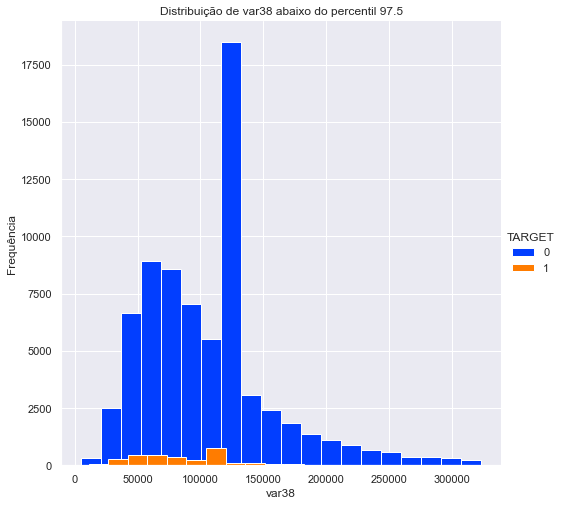

In [60]:
# Distribuições abaixo do percentil 97.5
distribuicao_percentil_97p5 = df_treino[df_treino['var38'] <=np.quantile(df_treino['var38'].values, 0.975)]
sns.FacetGrid(data = distribuicao_percentil_97p5, hue = 'TARGET', height = 7).map(plt.hist, 'var38', bins = 20).add_legend()
plt.title('Distribuição de var38 abaixo do percentil 97.5')
plt.ylabel('Frequência')
plt.show()

In [61]:
# Checando a assimetria
skewness = round(skew(distribuicao_percentil_97p5['var38']),2)
print(f'O coeficiente de assimetria é: {skewness}')

O coeficiente de assimetria é: 1.23


A curva de distribuição possui uma assimetria à direita, como pode ser constatado pelo coeficiente de assimetria de 1.23. Há um pico entre 100000 e 150000. Podemos aplicar uma transformação logaritmica para conferir como fica a distribuição.

In [62]:
#Obtendo a variável para plotar
distribuicao_percentil_97p5.loc[:,'var38'] = np.log(distribuicao_percentil_97p5.var38).values

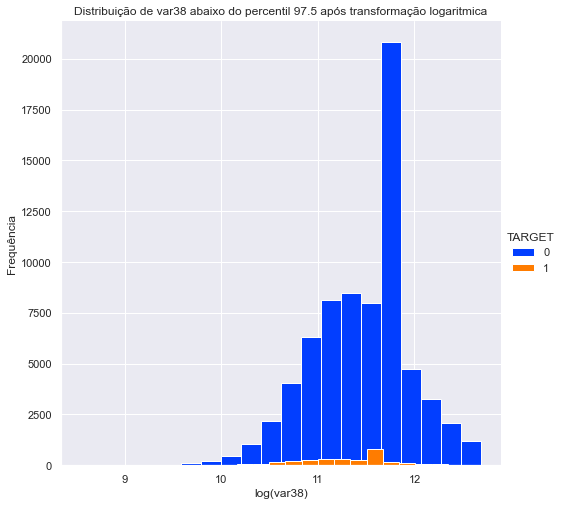

In [63]:
#Plotando a distribuição
sns.FacetGrid(data=distribuicao_percentil_97p5,hue='TARGET',height=7).map(plt.hist,'var38',bins=20).add_legend()
plt.title("Distribuição de var38 abaixo do percentil 97.5 após transformação logaritmica")
plt.xlabel('log(var38)')
plt.ylabel("Frequência")
plt.show()

In [64]:
skewness_log = round(skew(distribuicao_percentil_97p5.loc[:, 'var38']),2)
print(f'O coeficiente de assimetria após transformação logarítmica é: {skewness_log}')

O coeficiente de assimetria após transformação logarítmica é: -0.39


Aplicando a transformação logarítmica conseguimos reduzir a assimetria para -0.39 e ter uma noção melhor da distribuição dos dados. Vamos aplicar essa transformação na variável var38 e ver como sua distribuição fica.

In [65]:
# Aplicando a distribuição logaritmica em var38
df_treino.loc[:,'var38'] = np.log(df_treino['var38']).values

<Figure size 576x432 with 0 Axes>

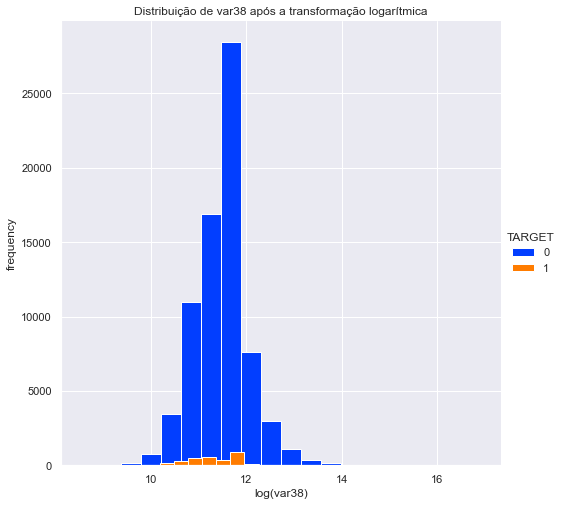

In [66]:
# Plot da distribuição de var38 após a transformação
plt.figure(figsize=(8,6))
sns.FacetGrid(data=df_treino,hue='TARGET',height=7).map(plt.hist,'var38',bins=20).add_legend()
plt.title('Distribuição de var38 após a transformação logarítmica')
plt.xlabel('log(var38)')
plt.ylabel("frequency")
plt.show()

<font color = 'DarkBlue'>**Conclusão:**</font> A variável var38 apresenta a maior parte dos seus valores acima do percentil 97,5. A plotagem dos valores abaixo desse percentil apresentou uma curva de distribuição assimétrica, que foi levemente corrigida após ser aplicada a distribuição logarítmica. Posteriormente poderemos criar um dataset contendo os valores originais e os valores transformados para fazer a análise preditiva com esses dois tipos de dados.

### Nomes das variáveis
<br>
É possível notar que algumas variáveis possuem um um código antes de nome. Por exemplo: <b>imp_ent_var16_ult1</b> possui o código "imp". Vamos coletar cada um desses códigos e fazer inferências a respeito deles de acordo com a ordem de cada frequência.

In [67]:
# Recapitulando os nomes das variáveis
df_treino.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3',
       ...
       'saldo_medio_var12_hace2', 'saldo_medio_var12_hace3',
       'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3',
       'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_hace3',
       'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'var38',
       'TARGET'],
      dtype='object', length=143)

As variáveis estão separadas por underscore (_), dessa forma podemos utilizar isso para fazer o split.

In [68]:
# Extraindo o código das variáveis
codigos = {col.split('_')[0] for col in df_treino.columns}
codigos

{'ID',
 'TARGET',
 'imp',
 'ind',
 'num',
 'saldo',
 'var15',
 'var21',
 'var3',
 'var36',
 'var38'}

In [69]:
# Alguns códigos desnecessárias foram coletados juntos. Vamos reformular o código acima
codigos = {col.split('_')[0] for col in df_treino.columns if (len(col.split('_'))>1) & ~('var15' in col)}
codigos

{'imp', 'ind', 'num', 'saldo'}

In [70]:
# Contando a frequência que cada código aparece
codigos = dict(zip(codigos,np.zeros(len(codigos),dtype=int)))
for codigo in codigos.keys():
    for coluna in df_treino.columns:
        if codigo in coluna:
            codigos[codigo]+=1
            
codigos

{'saldo': 26, 'num': 64, 'ind': 32, 'imp': 14}

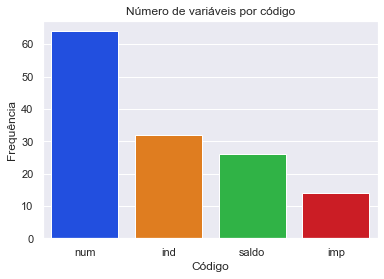

O código de maior frequência é "num" e ele aparece 64 vezes
O código de menor frequência é "imp" e ele aparece 14 vezes


In [71]:
# Observando graficamente
codigos_series = pd.Series(codigos)
sns.barplot(x=codigos_series.index,y=codigos_series.values, order = codigos_series.sort_values(ascending = False).index)
plt.title("Número de variáveis por código")
plt.ylabel('Frequência')
plt.xlabel('Código')
plt.show()

print(f'O código de maior frequência é "{codigos_series.idxmax()}" e ele aparece {codigos_series.max()} vezes')
print(f'O código de menor frequência é "{codigos_series.idxmin()}" e ele aparece {codigos_series.min()} vezes')

<b> Código imp</b>
<br>
<br>
Pela inferência obtida no fórum de discussão do Kaggle, o código imp está relacionado com quantia (do espanhol: importe. Lembrando que o Santander tem origem espanhola)

In [72]:
# Obtendo a lista com todas as variáveis imp
codigo_imp_lista = [coluna for coluna in df_treino.columns if 'imp' in coluna]
print('As variáveis com código "imp" são: ')


print('')
for i in codigo_imp_lista:
    print(i)

print(50*'-')
print(f'Existem {len(codigo_imp_lista)} variáveis com código "imp"')

As variáveis com código "imp" são: 

imp_ent_var16_ult1
imp_op_var39_comer_ult1
imp_op_var39_comer_ult3
imp_op_var41_comer_ult1
imp_op_var41_comer_ult3
imp_op_var41_efect_ult1
imp_op_var41_efect_ult3
imp_op_var41_ult1
imp_op_var39_efect_ult1
imp_op_var39_efect_ult3
imp_op_var39_ult1
imp_aport_var13_hace3
imp_var43_emit_ult1
imp_trans_var37_ult1
--------------------------------------------------
Existem 14 variáveis com código "imp"


Vamos selecionar randomicamente duas dessas variáveis para analisar.

In [73]:
# Gerando valores randomicos
random.seed(a=6)
codigo_imp = random.sample(codigo_imp_lista,2)
print(f'As variáveis imp escolhidas aleatoriamente foram "{codigo_imp[0]}" e "{codigo_imp[1]}"')

As variáveis imp escolhidas aleatoriamente foram "imp_var43_emit_ult1" e "imp_op_var39_efect_ult3"


<font color = 'DarkBlue'><b>imp_var43_emit_ult1</font></b>

In [74]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável "{codigo_imp[0]}" é {df_treino[codigo_imp[0]].min()} \
e seu valor máximo é {df_treino[codigo_imp[0]].max()}')

O valor mínimo da variável "imp_var43_emit_ult1" é 0.0 e seu valor máximo é 1155003.0


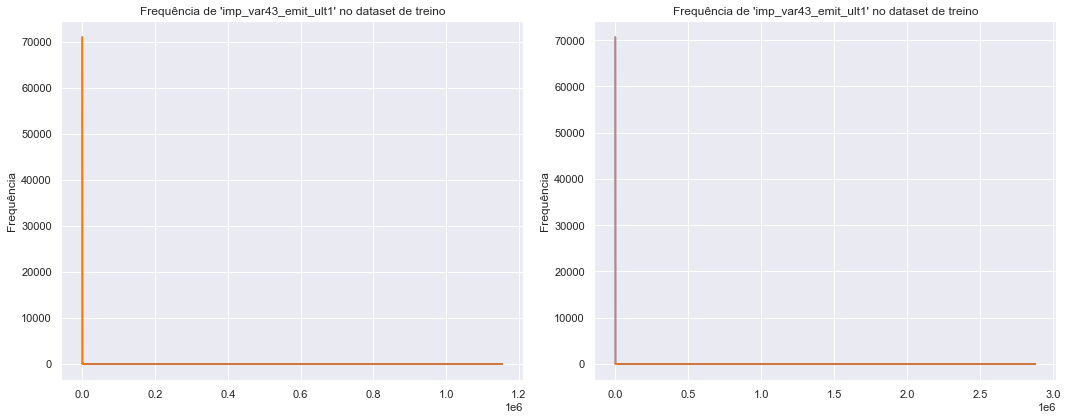

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'imp_var43_emit_ult1' no dataset de treino:
Valor	 Frequencia%
0.0       93.341226
3000.0     0.153907
300.0      0.149961
1500.0     0.140752
900.0      0.127598
Name: imp_var43_emit_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'imp_var43_emit_ult1' no dataset de treino:
Valor	 Frequencia%
12750.00     0.001315
5874.00      0.001315
831.36       0.001315
156.36       0.001315
253200.00    0.001315
Name: imp_var43_emit_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'imp_var43_emit_ult1' no dataset de teste:
Valor	 Frequencia%
0.0       93.199504
1500.0     0.164869
3000.0     0.146403
300.0      0.143765
600.0      0

In [75]:
col = codigo_imp[0]
valuecounts_duplo(col)

Aproximadamente 93% dessa variável tanto no dataset de treino quanto no de teste é constituída de zeros. Vamos plotar novamente, dessa vez excluindo os valores zero.

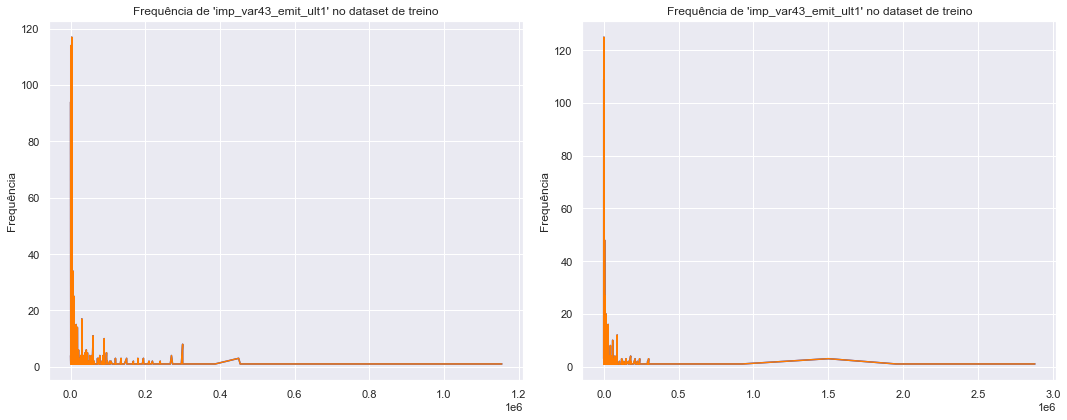

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'imp_var43_emit_ult1' no dataset de treino:
Valor	 Frequencia%
3000.0    2.311339
300.0     2.252074
1500.0    2.113789
900.0     1.916239
90.0      1.856974
Name: imp_var43_emit_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'imp_var43_emit_ult1' no dataset de treino:
Valor	 Frequencia%
12750.00     0.019755
5874.00      0.019755
831.36       0.019755
156.36       0.019755
253200.00    0.019755
Name: imp_var43_emit_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'imp_var43_emit_ult1' no dataset de teste:
Valor	 Frequencia%
1500.0    2.424360
3000.0    2.152832
300.0     2.114042
600.0     1.842514
150.0     1.667960
Na

In [76]:
valuecounts_duplo(col, df1 = df_treino[df_treino[col]!=0], df2 = df_teste[df_teste[col]!=0])

Vamos aplicar a transformação logaritmica sem incluir os valores 0 e checar a nova distribuição

In [77]:
# Transformação logaritmica para os datasets de treino e teste sem o 0
df_imp_log_treino, df_imp_log_teste = aplicar_log_sem_zero(col, df_treino, df_teste)

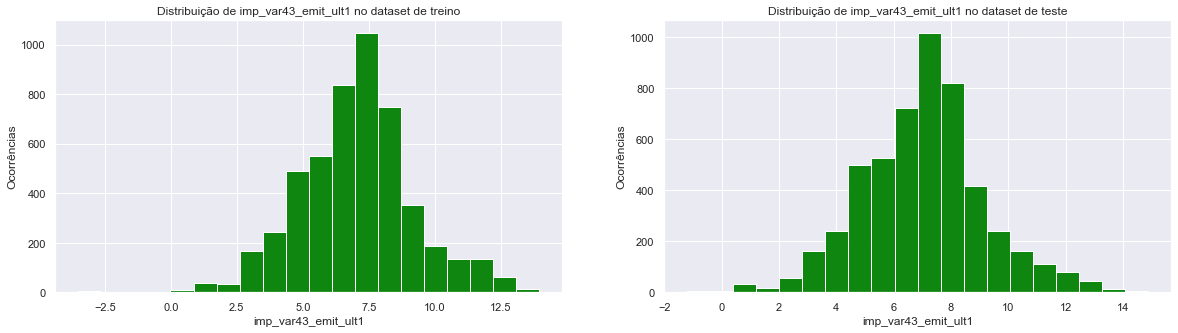

In [78]:
# Histplot após a transformação
histplot_duplo(col, df1=df_imp_log_treino, df2 = df_imp_log_teste)

In [79]:
# Checando os coeficientes de assimetria
print(f'O coeficiente de assimetria da distribuição do dataset de treino é {round(skew(df_imp_log_treino[col]),2)} \
e o coeficiente de assimetria da distribuição do dataset de teste é {round(skew(df_imp_log_teste[col]),2)}')

O coeficiente de assimetria da distribuição do dataset de treino é -0.05 e o coeficiente de assimetria da distribuição do dataset de teste é 0.13


Com a transformação logarítmica, podemos ver pela imagem e pelo coeficiente de assimetria que as distribuições tanto do dataset de treino e de teste se aproximam de uma gaussiana. Vamos ver como fica a distribuição com a transformação logaritmica incluindo o zero.

In [80]:
# Transformação logaritmica para os datasets de treino e teste com o 0
df_imp_log_treino_0, df_imp_log_teste_0 = aplicar_log_com_zero(col, df_treino, df_teste)

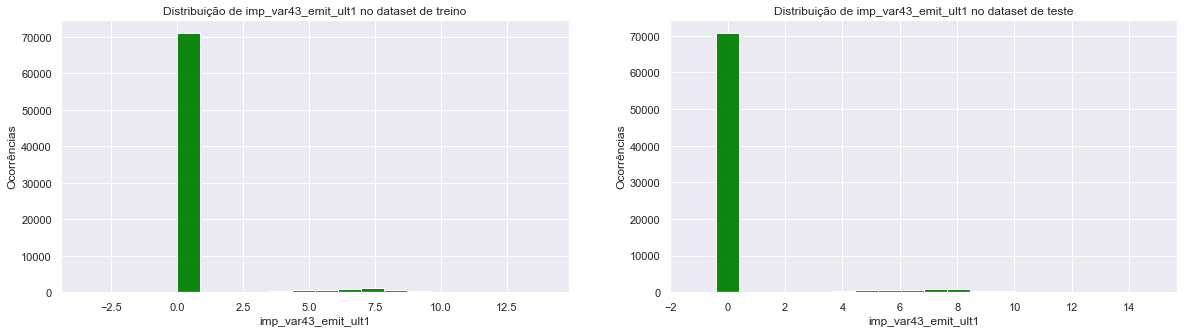

In [81]:
# Histplot após a transformação
histplot_duplo(col, df1 = df_imp_log_treino_0, df2 = df_imp_log_teste_0)

Em ambos os casos, como constatado, há um grande pico de distribuição no valor 0.
<br>
Vamos agora fazer o mesmo tipo de análise para a próxima variável.

<font Color = 'DarkBlue'><b>imp_op_var39_efect_ult3</b></font>
<br>
<br>
Faremos os mesmos procedimentos que foram feitos na variável anterior.

In [82]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável "{codigo_imp[1]}" é {df_treino[codigo_imp[1]].min()} \
e seu valor máximo é {df_treino[codigo_imp[1]].max()}')

O valor mínimo da variável "imp_op_var39_efect_ult3" é 0.0 e seu valor máximo é 131100.0


In [83]:
# Estabelecendo a coluna para usar em nossas funções
col_2 = codigo_imp[1]

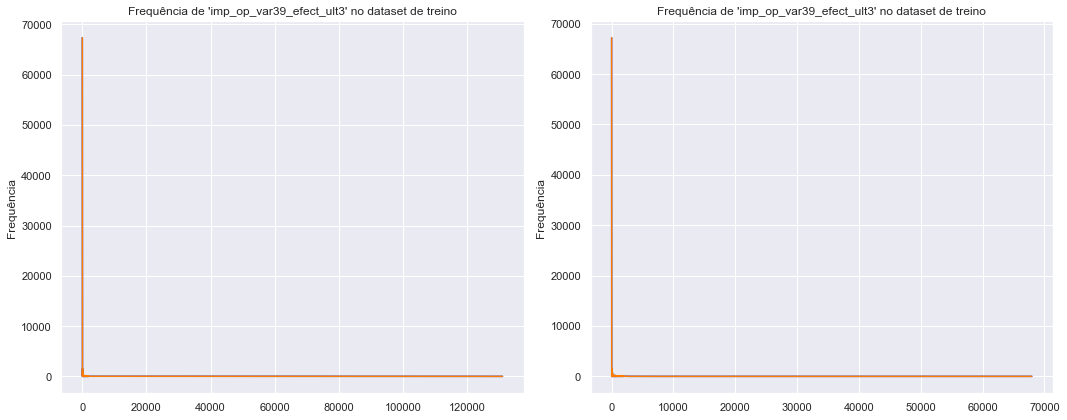

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'imp_op_var39_efect_ult3' no dataset de treino:
Valor	 Frequencia%
0.0      88.608261
60.0      2.063931
120.0     0.912918
180.0     0.463036
240.0     0.367009
Name: imp_op_var39_efect_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'imp_op_var39_efect_ult3' no dataset de treino:
Valor	 Frequencia%
9420.0     0.001315
326.7      0.001315
15240.0    0.001315
9000.0     0.001315
315.0      0.001315
Name: imp_op_var39_efect_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'imp_op_var39_efect_ult3' no dataset de teste:
Valor	 Frequencia%
0.0      88.668918
60.0      1.934897
120.0     1.007676
180.0     0.482735
300.0     0

In [84]:
# Plot do valuecounts para o dataset de treino e de teste
valuecounts_duplo(col_2)

O valor zero novamente é o mais frequente, dessa vez com aproximadamente 88.6% de ocorrência em cada dataset (treino e teste).

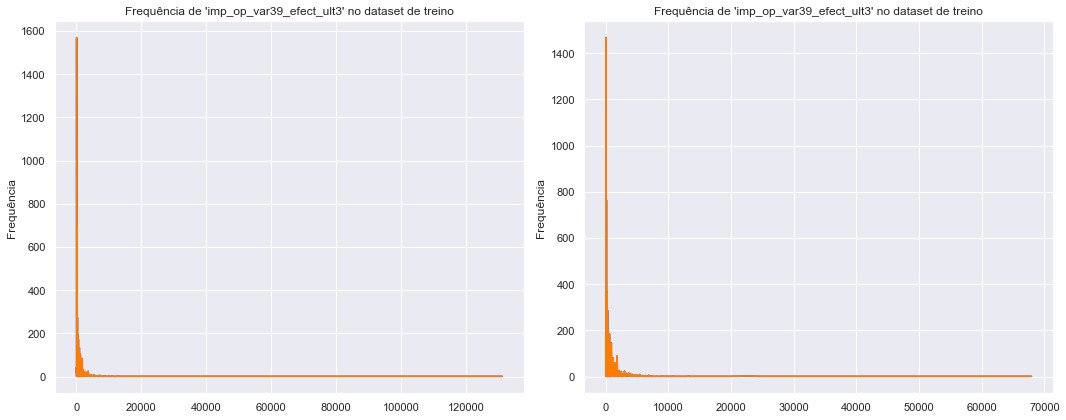

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'imp_op_var39_efect_ult3' no dataset de treino:
Valor	 Frequencia%
60.0     18.117783
120.0     8.013857
180.0     4.064665
240.0     3.221709
300.0     3.163972
Name: imp_op_var39_efect_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'imp_op_var39_efect_ult3' no dataset de treino:
Valor	 Frequencia%
9420.0     0.011547
326.7      0.011547
15240.0    0.011547
9000.0     0.011547
315.0      0.011547
Name: imp_op_var39_efect_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'imp_op_var39_efect_ult3' no dataset de teste:
Valor	 Frequencia%
60.0     17.076010
120.0     8.893028
180.0     4.260272
300.0     3.329065
240.0     3

In [85]:
# Valuecounts sem o valor zero
valuecounts_duplo(col_2, df1 = df_treino[df_treino[col_2]!=0], df2 = df_teste[df_teste[col_2]!=0])

In [86]:
# Aplicando a transformação logaritmica sem o zero
df_imp_log_treino_2, df_imp_log_teste_2 = aplicar_log_sem_zero(col_2, df_treino, df_teste)

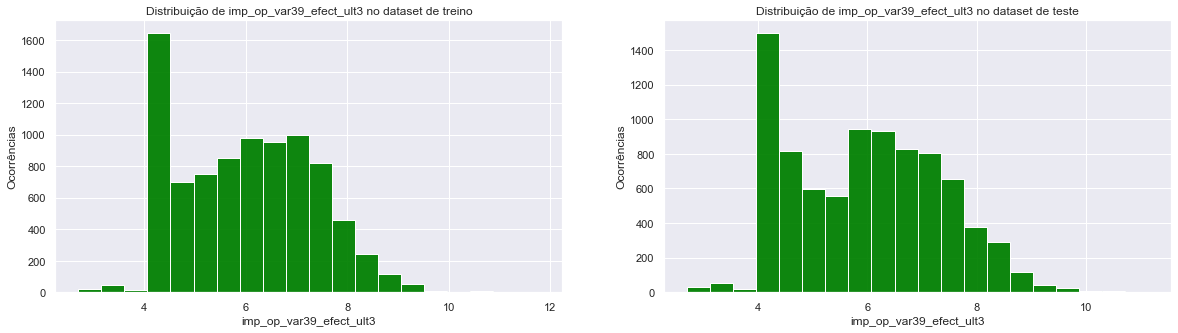

In [87]:
# Histplot após a transformação logaritmica
histplot_duplo(col_2, df1 = df_imp_log_treino_2, df2 = df_imp_log_teste_2)

In [88]:
# Checando os coeficientes de assimetria
print(f'O coeficiente de assimetria da distribuição do dataset de treino é {round(skew(df_imp_log_treino_2[col_2]),2)} \
e o coeficiente de assimetria da distribuição do dataset de teste é {round(skew(df_imp_log_teste_2[col_2]),2)}')

O coeficiente de assimetria da distribuição do dataset de treino é 0.16 e o coeficiente de assimetria da distribuição do dataset de teste é 0.17


In [89]:
# Aplicando a transformação logaritmica e incluindo o zero
df_imp_log_treino_2_0, df_imp_log_teste_2_0 = aplicar_log_com_zero(col_2, df_treino, df_teste)

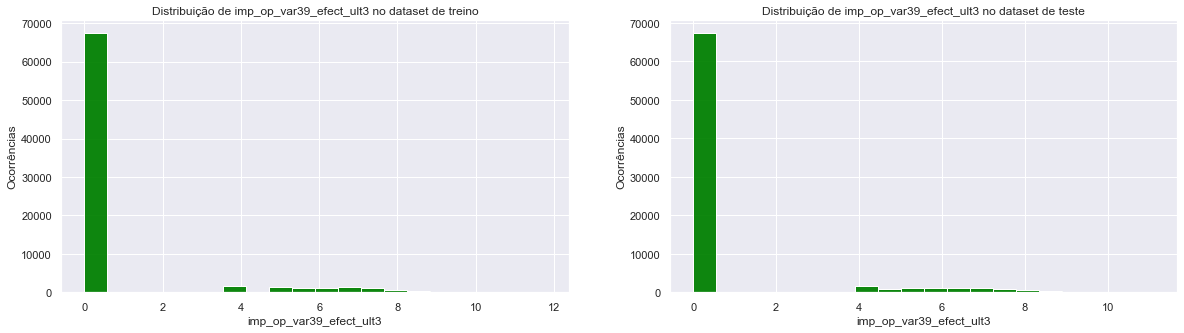

In [90]:
# Histplot após transformação logarítmica e incluindo o 0
histplot_duplo(col_2, df1 = df_imp_log_treino_2_0, df2 = df_imp_log_teste_2_0)

In [91]:
# Analisando cada variável com código imp
for elemento in codigo_imp_lista:
    print("%s \t\t unique-values:%i \t\t dtype:%s"%(elemento,df_treino[elemento].nunique(),df_treino[elemento].dtype))

imp_ent_var16_ult1 		 unique-values:596 		 dtype:float64
imp_op_var39_comer_ult1 		 unique-values:7551 		 dtype:float64
imp_op_var39_comer_ult3 		 unique-values:9099 		 dtype:float64
imp_op_var41_comer_ult1 		 unique-values:7421 		 dtype:float64
imp_op_var41_comer_ult3 		 unique-values:8961 		 dtype:float64
imp_op_var41_efect_ult1 		 unique-values:331 		 dtype:float64
imp_op_var41_efect_ult3 		 unique-values:454 		 dtype:float64
imp_op_var41_ult1 		 unique-values:8032 		 dtype:float64
imp_op_var39_efect_ult1 		 unique-values:336 		 dtype:float64
imp_op_var39_efect_ult3 		 unique-values:462 		 dtype:float64
imp_op_var39_ult1 		 unique-values:8149 		 dtype:float64
imp_aport_var13_hace3 		 unique-values:425 		 dtype:float64
imp_var43_emit_ult1 		 unique-values:2342 		 dtype:float64
imp_trans_var37_ult1 		 unique-values:3831 		 dtype:float64


<font color = 'DarkBlue'><b>Conclusão para o código imp</font></b>

Em ambas as variáveis selecionadas randomicante do código imp(<b>imp_var43_emit_ult1</b> e <b>imp_op_var39_efect_ult3</b>) a predominância é do valor 0. 
<br>
Ao fazer a retirada deste valor e aplicar a transformação logaritmica, as distribuições se aproximaram de uma gaussiana.
<br>
A análise de cada variável com código imp (quantidade de valores únicos e dtype = float64) indica que trata-se de variáveis numéricas.
<br>
Poderemos criar datasets com os valores originais e transformados para realizar o modelo preditivo.

<b>Código saldo</b>

In [92]:
# Obtendo a lista com todas as variáveis saldo
codigo_saldo_lista = [coluna for coluna in df_treino.columns if 'saldo' in coluna]
print('As variáveis com código "saldo" são: ')


print('')
for i in codigo_saldo_lista:
    print(i)

print(50*'-')
print(f'Existem {len(codigo_saldo_lista)} variáveis com código "saldo"')

As variáveis com código "saldo" são: 

saldo_var5
saldo_var8
saldo_var12
saldo_var13_corto
saldo_var13
saldo_var24
saldo_var26
saldo_var25
saldo_var30
saldo_var37
saldo_var42
saldo_medio_var5_hace2
saldo_medio_var5_hace3
saldo_medio_var5_ult1
saldo_medio_var5_ult3
saldo_medio_var8_hace2
saldo_medio_var8_ult1
saldo_medio_var8_ult3
saldo_medio_var12_hace2
saldo_medio_var12_hace3
saldo_medio_var12_ult1
saldo_medio_var12_ult3
saldo_medio_var13_corto_hace2
saldo_medio_var13_corto_hace3
saldo_medio_var13_corto_ult1
saldo_medio_var13_corto_ult3
--------------------------------------------------
Existem 26 variáveis com código "saldo"


In [93]:
# Gerando valores randomicos
random.seed(a=79)
codigo_saldo = random.sample(codigo_saldo_lista,2)
print(f'As variáveis saldo escolhidas aleatoriamente foram "{codigo_saldo[0]}" e "{codigo_saldo[1]}"')

As variáveis saldo escolhidas aleatoriamente foram "saldo_var13" e "saldo_medio_var5_ult3"


<font Color = 'DarkBlue'><b>saldo_var13</b></font>

In [94]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável no dataset de treino é "{codigo_saldo[0]}" é {df_treino[codigo_saldo[0]].min()} \
e seu valor máximo é {df_treino[codigo_saldo[0]].max()}')

print(f'O valor mínimo da variável no dataset de teste é "{codigo_saldo[0]}" é {df_teste[codigo_saldo[0]].min()} \
e seu valor máximo é {df_teste[codigo_saldo[0]].max()}')

O valor mínimo da variável no dataset de treino é "saldo_var13" é 0.0 e seu valor máximo é 1500000.0
O valor mínimo da variável no dataset de teste é "saldo_var13" é 0.0 e seu valor máximo é 1008000.0


In [95]:
# Preparando as variáveis para usar em nossas funções de análise
col_3 = codigo_saldo[0] #saldo_medio_var5_ult3
col_4 = codigo_saldo[1] #saldo_medio_var5_ult3

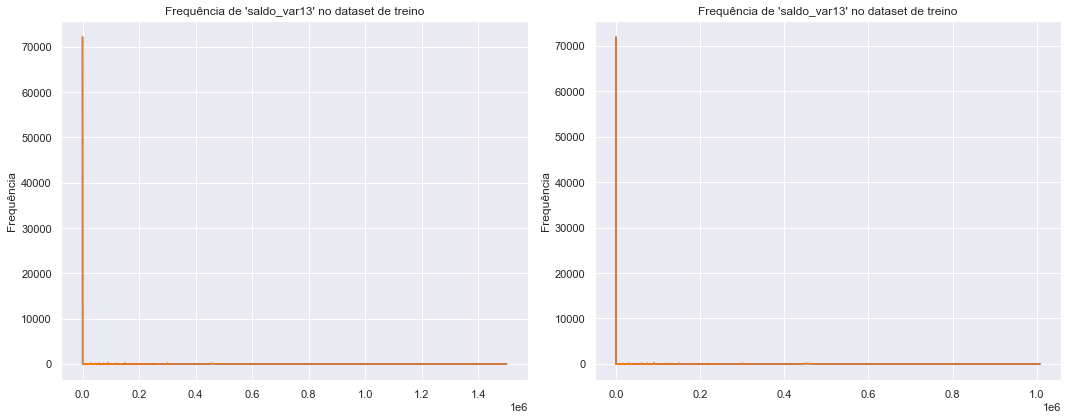

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'saldo_var13' no dataset de treino:
Valor	 Frequencia%
0.0         94.914496
90000.0      0.249934
150000.0     0.226256
300000.0     0.209155
30000.0      0.194686
Name: saldo_var13, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'saldo_var13' no dataset de treino:
Valor	 Frequencia%
92040.00     0.001315
117924.60    0.001315
297030.00    0.001315
182455.92    0.001315
72005.70     0.001315
Name: saldo_var13, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'saldo_var13' no dataset de teste:
Valor	 Frequencia%
0.0         94.812577
90000.0      0.288850
300000.0     0.218945
150000.0     0.208394
30000.0      0.207075
Name: saldo_

In [96]:
# Observando a distribuição
valuecounts_duplo(col_3, df_treino, df_teste)

Aproximadamente 95% do valor de ambos os datasets é constituído do valor 0. Vamos retirá-lo para ver como fica a distribuição.

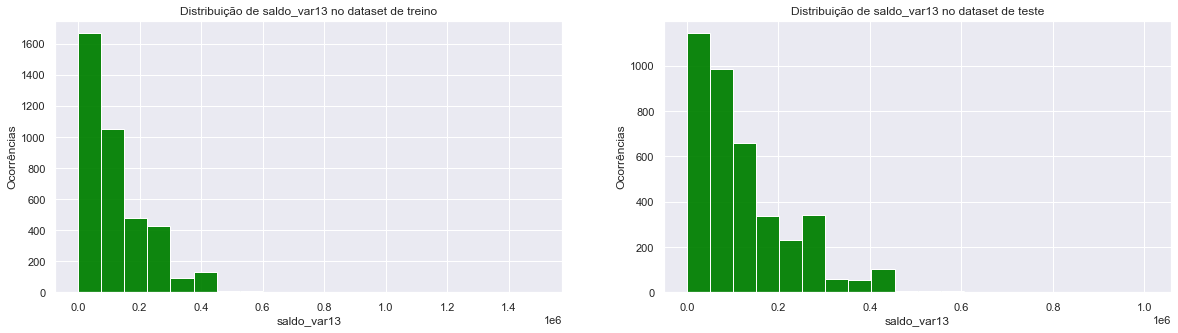

In [97]:
# Observando o histplot sem o valor zero
histplot_duplo(col_3, df_treino[df_treino[col_3]!=0], df_teste[df_teste[col_3]!=0])

In [98]:
# Checando os coeficientes de assimetria
print(f'O coeficiente de assimetria da distribuição do dataset de treino é {round(skew(df_treino[col_3]),2)} \
e o coeficiente de assimetria da distribuição do dataset de teste é {round(skew(df_teste[col_3]),2)}')

O coeficiente de assimetria da distribuição do dataset de treino é 8.61 e o coeficiente de assimetria da distribuição do dataset de teste é 8.03


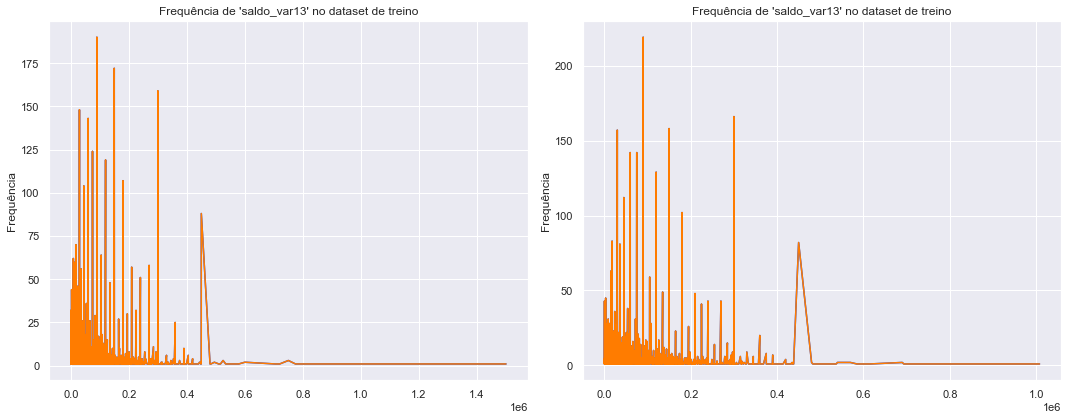

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'saldo_var13' no dataset de treino:
Valor	 Frequencia%
90000.0     4.914640
150000.0    4.449043
300000.0    4.112778
30000.0     3.828246
60000.0     3.698914
Name: saldo_var13, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'saldo_var13' no dataset de treino:
Valor	 Frequencia%
92040.00     0.025867
117924.60    0.025867
297030.00    0.025867
182455.92    0.025867
72005.70     0.025867
Name: saldo_var13, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'saldo_var13' no dataset de teste:
Valor	 Frequencia%
90000.0     5.568268
300000.0    4.220697
150000.0    4.017290
30000.0     3.991864
60000.0     3.610475
Name: saldo_var13, dty

In [99]:
# Fazendo a contagem de valores para a nova distribuição
valuecounts_duplo(col_3, df_treino[df_treino[col_3]!=0], df_teste[df_teste[col_3]!=0])

In [100]:
# Transformação logaritmica para os datasets de treino e teste sem o 0
df_saldo_log_treino, df_saldo_log_teste = aplicar_log_sem_zero(col_3, df_treino, df_teste)

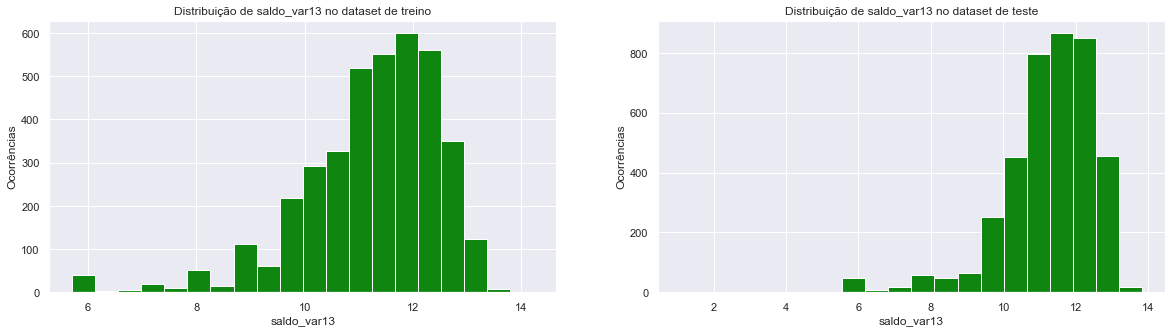

In [101]:
# Checando o novo histplot
histplot_duplo(col_3, df_saldo_log_treino, df_saldo_log_teste)

In [102]:
# Checando os coeficientes de assimetria
print(f'O coeficiente de assimetria da distribuição do dataset de treino é {round(skew(df_saldo_log_treino[col_3]),2)} \
e o coeficiente de assimetria da distribuição do dataset de teste é {round(skew(df_saldo_log_teste[col_3]),2)}')

O coeficiente de assimetria da distribuição do dataset de treino é -1.4 e o coeficiente de assimetria da distribuição do dataset de teste é -1.64


In [103]:
# Transformação logaritmica para os datasets de treino e teste com o 0
df_saldo_log_treino_0, df_saldo_log_teste_0 = aplicar_log_com_zero(col_3, df_treino, df_teste)

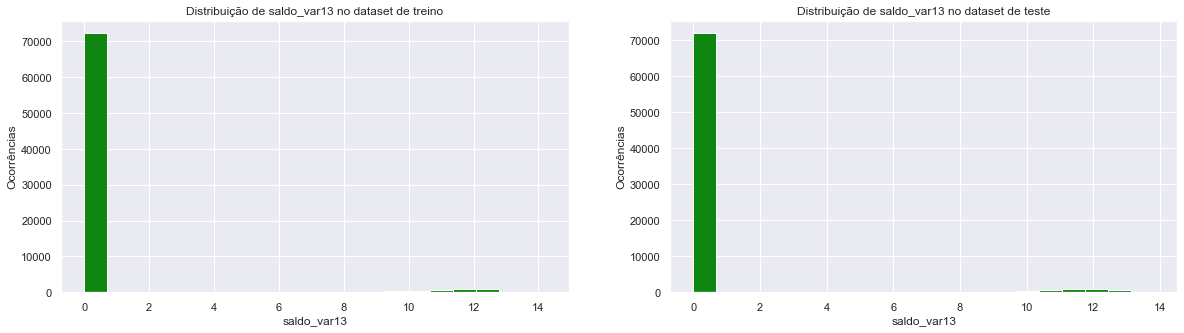

In [104]:
histplot_duplo(col_3, df_saldo_log_treino_0, df_saldo_log_teste_0)

<font Color = 'DarkBlue'><b>saldo_medio_var5_ult3</b></font>

In [105]:
# Definindo a coluna a ser usada
col_4 = codigo_saldo[1]
print(col_4)

saldo_medio_var5_ult3


In [106]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável "{col_4}" no dataset de treino é {df_treino[col_4].min()} \
e seu valor máximo é {df_treino[col_4].max()}')

print(f'O valor mínimo da variável "{col_4}" no dataset de teste é {df_teste[col_4].min()} \
e seu valor máximo é {df_teste[col_4].max()}')

O valor mínimo da variável "saldo_medio_var5_ult3" no dataset de treino é -476.07 e seu valor máximo é 544365.57
O valor mínimo da variável "saldo_medio_var5_ult3" no dataset de teste é -1036.08 e seu valor máximo é 482422.35


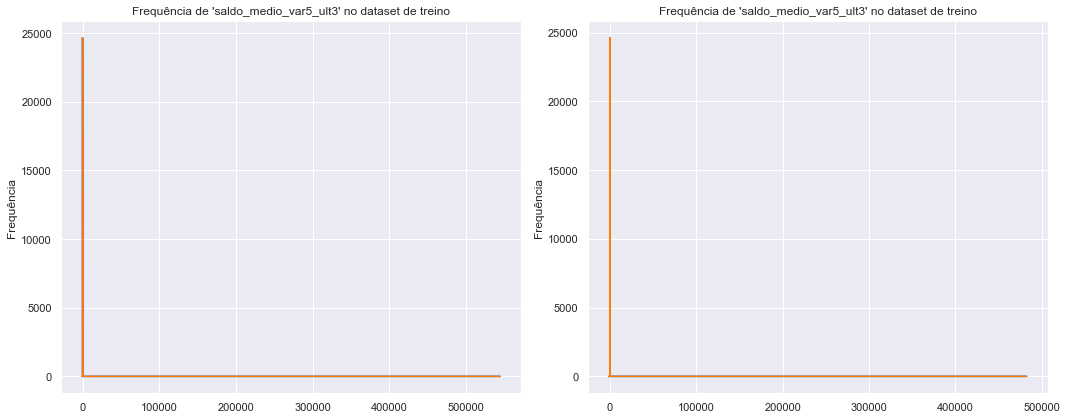

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'saldo_medio_var5_ult3' no dataset de treino:
Valor	 Frequencia%
0.00    32.444094
2.88     1.452249
2.34     1.318074
2.85     1.295712
2.07     1.248356
Name: saldo_medio_var5_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'saldo_medio_var5_ult3' no dataset de treino:
Valor	 Frequencia%
516.36     0.001315
1229.40    0.001315
82.35      0.001315
1750.17    0.001315
1025.37    0.001315
Name: saldo_medio_var5_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'saldo_medio_var5_ult3' no dataset de teste:
Valor	 Frequencia%
0.00    32.479095
2.88     1.433696
2.34     1.338732
2.07     1.328181
2.85     1.292569
Name: saldo_

In [107]:
# Observando a distribuição
valuecounts_duplo(col_4, df_treino, df_teste)

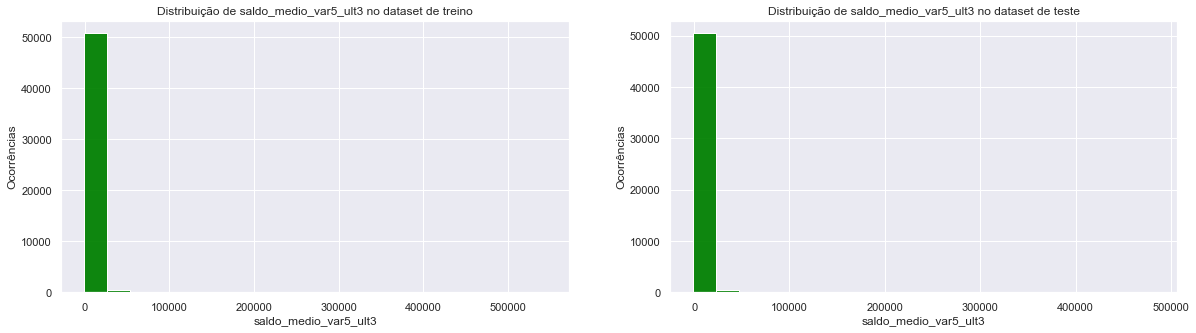

In [108]:
# histplot sem o zero
histplot_duplo(col_4, df_treino[df_treino[col_4]!=0], df_teste[df_teste[col_4]!=0])

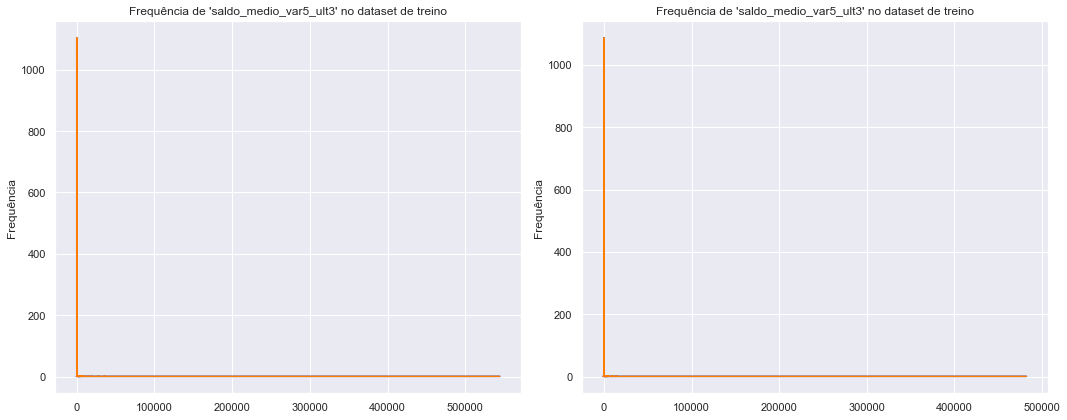

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'saldo_medio_var5_ult3' no dataset de treino:
Valor	 Frequencia%
2.88    2.149700
2.34    1.951087
2.85    1.917984
2.07    1.847885
2.79    1.686268
Name: saldo_medio_var5_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'saldo_medio_var5_ult3' no dataset de treino:
Valor	 Frequencia%
516.36     0.001947
1229.40    0.001947
82.35      0.001947
1750.17    0.001947
1025.37    0.001947
Name: saldo_medio_var5_ult3, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'saldo_medio_var5_ult3' no dataset de teste:
Valor	 Frequencia%
2.88    2.123337
2.34    1.982693
2.07    1.967066
2.85    1.914324
2.79    1.802981
Name: saldo_medio_var5

In [109]:
# Frequencia de valores sem o zero
valuecounts_duplo(col_4, df_treino[df_treino[col_4]!=0], df_teste[df_teste[col_4]!=0])

In [110]:
# Aplicando a transformação logaritmica sem incluir o 0
df_saldo_log_treino_2, df_saldo_log_teste_2 = aplicar_log_sem_zero(col_4, df_treino, df_teste)

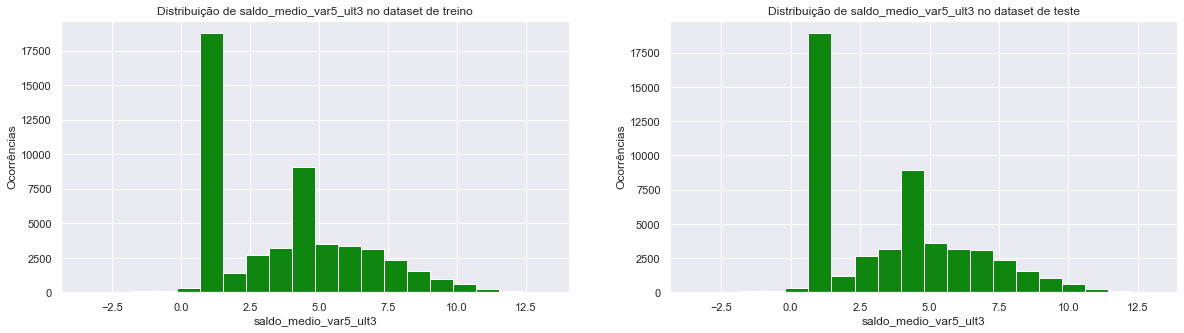

In [111]:
# Histplot da distribuição logaritmica sem o 0
histplot_duplo(col_4, df_saldo_log_treino_2, df_saldo_log_teste_2)

In [112]:
# Aplicando a transformação logaritmica incluindo o 0
df_saldo_log_treino_2_0, df_saldo_log_teste_2_0 = aplicar_log_com_zero(col_4, df_treino, df_teste)

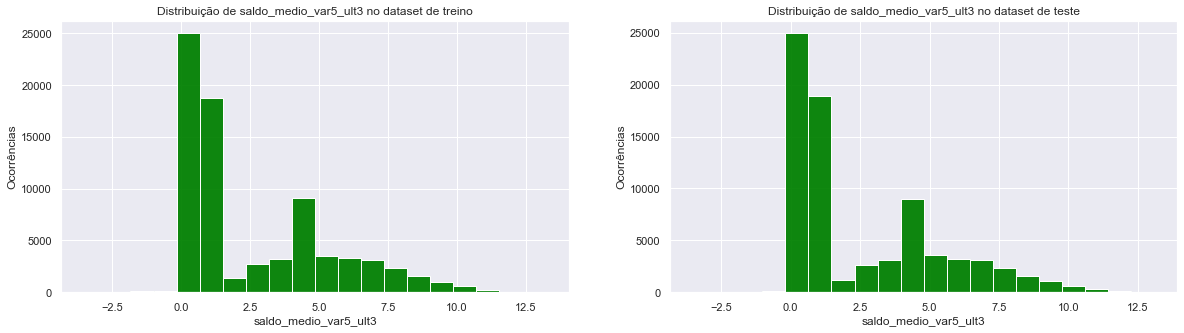

In [113]:
# Histplot da distribuição logarítmica com o 0
histplot_duplo(col_4, df_saldo_log_treino_2_0, df_saldo_log_teste_2_0)

In [114]:
# Analisando cada variável com código saldo
for elemento in codigo_saldo_lista:
    print("%s \t\t unique-values:%i \t\t dtype:%s"%(elemento,df_treino[elemento].nunique(),df_treino[elemento].dtype))

saldo_var5 		 unique-values:11642 		 dtype:float64
saldo_var8 		 unique-values:1989 		 dtype:float64
saldo_var12 		 unique-values:3059 		 dtype:float64
saldo_var13_corto 		 unique-values:730 		 dtype:float64
saldo_var13 		 unique-values:859 		 dtype:float64
saldo_var24 		 unique-values:2614 		 dtype:float64
saldo_var26 		 unique-values:1592 		 dtype:float64
saldo_var25 		 unique-values:1524 		 dtype:float64
saldo_var30 		 unique-values:16940 		 dtype:float64
saldo_var37 		 unique-values:4041 		 dtype:float64
saldo_var42 		 unique-values:15730 		 dtype:float64
saldo_medio_var5_hace2 		 unique-values:14486 		 dtype:float64
saldo_medio_var5_hace3 		 unique-values:7787 		 dtype:float64
saldo_medio_var5_ult1 		 unique-values:14778 		 dtype:float64
saldo_medio_var5_ult3 		 unique-values:17330 		 dtype:float64
saldo_medio_var8_hace2 		 unique-values:1325 		 dtype:float64
saldo_medio_var8_ult1 		 unique-values:2116 		 dtype:float64
saldo_medio_var8_ult3 		 unique-values:2173 		 dtype:float64
s

<font color = 'DarkBlue'>**Conclusão para variáveis do código saldo:**</font> As variaveis do código saldo apresentam dtype float64, e suas quantidades de valores únicos fazem concluir que trata-se de uma variáveil numérica. A aplicação da transformação logarítmica corrigiu um pouco a assimetria da distribuição, o que nos leva a sustentar a ideia já mencionada de criar um dataset com essas variáveis transformadas e um com as variáveis originais para utilizar no modelo preditivo.

<b>Código ind</b>

In [115]:
# Obtendo a lista com todas as variáveis ind
codigo_ind_lista = [coluna for coluna in df_treino.columns if 'ind' in coluna]
print('As variáveis com código "ind" são: ')


print('')
for i in codigo_ind_lista:
    print(i)

print(50*'-')
print(f'Existem {len(codigo_ind_lista)} variáveis com código "ind"')

As variáveis com código "ind" são: 

ind_var1_0
ind_var5_0
ind_var5
ind_var8_0
ind_var8
ind_var12_0
ind_var12
ind_var13_0
ind_var13_corto_0
ind_var13_corto
ind_var13_largo_0
ind_var13
ind_var14_0
ind_var24_0
ind_var24
ind_var25_cte
ind_var26_0
ind_var26_cte
ind_var25_0
ind_var30_0
ind_var30
ind_var37_cte
ind_var37_0
ind_var39_0
ind_var40_0
ind_var41_0
ind_var10_ult1
ind_var10cte_ult1
ind_var9_cte_ult1
ind_var9_ult1
ind_var43_emit_ult1
ind_var43_recib_ult1
--------------------------------------------------
Existem 32 variáveis com código "ind"


In [116]:
# Gerando valores randomicos
random.seed(a=61)
codigo_ind = random.sample(codigo_ind_lista,2)
print(f'As variáveis ind escolhidas aleatoriamente foram "{codigo_ind[0]}" e "{codigo_ind[1]}"')

As variáveis ind escolhidas aleatoriamente foram "ind_var43_recib_ult1" e "ind_var13"


<font Color = 'DarkBlue'><b>ind_var43_recib_ult1</b></font>

In [117]:
# Definindo a coluna
col_5 = codigo_ind[0]
print(col_5)

ind_var43_recib_ult1


In [118]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável "{col_5}" no dataset de treino é {df_treino[col_5].min()} \
e seu valor máximo é {df_treino[col_5].max()}')

print(f'O valor mínimo da variável "{col_5}" no dataset de teste é {df_teste[col_5].min()} \
e seu valor máximo é {df_teste[col_5].max()}')

O valor mínimo da variável "ind_var43_recib_ult1" no dataset de treino é 0 e seu valor máximo é 1
O valor mínimo da variável "ind_var43_recib_ult1" no dataset de teste é 0 e seu valor máximo é 1


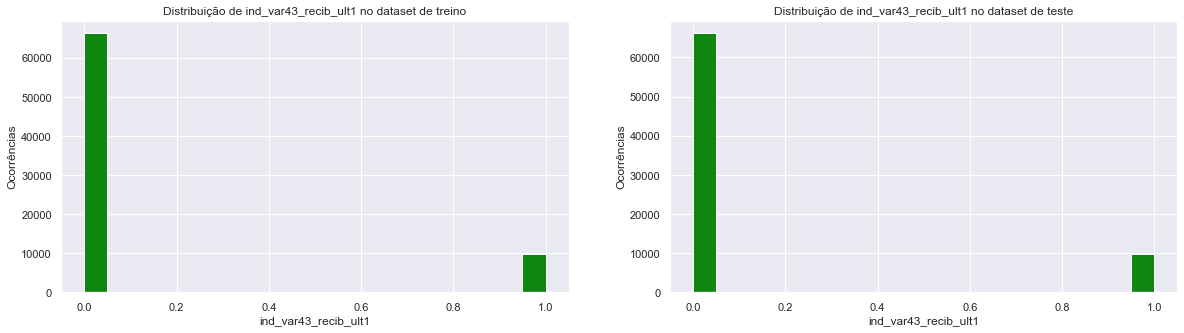

In [119]:
# Histplot de ind_var43_recib_ult1
histplot_duplo(col_5, df_treino, df_teste)

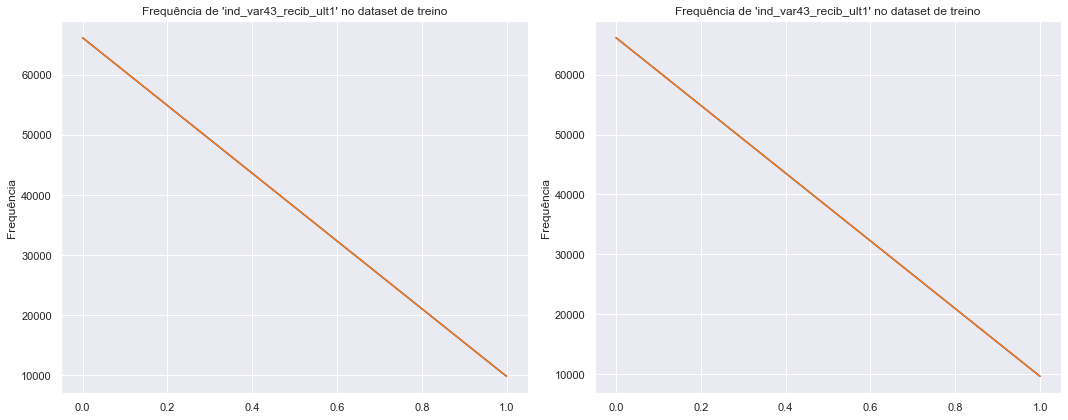

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'ind_var43_recib_ult1' no dataset de treino:
Valor	 Frequencia%
0    87.069192
1    12.930808
Name: ind_var43_recib_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'ind_var43_recib_ult1' no dataset de treino:
Valor	 Frequencia%
0    87.069192
1    12.930808
Name: ind_var43_recib_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'ind_var43_recib_ult1' no dataset de teste:
Valor	 Frequencia%
0    87.235221
1    12.764779
Name: ind_var43_recib_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'ind_var43_recib_ult1'

In [120]:
# Frequencias de ind_var43_recib_ult1
valuecounts_duplo(col_5, df_treino, df_teste)

In [121]:
# Valores categóricos
np.array(sorted(df_treino[col_5].unique()))

array([0, 1], dtype=int64)

Como podemos ver pela análise acima, os valores de ind_var43_recib_ult1 são apenas 0 e 1, ou seja, trata-se de uma variável categórica onde há predominância do valor 0.

<font Color = 'DarkBlue'><b>ind_var13</b></font>

In [122]:
# Definindo a coluna
col_6 = codigo_ind[1]
print(col_6)

ind_var13


In [123]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável "{col_6}" no dataset de treino é {df_treino[col_6].min()} \
e seu valor máximo é {df_treino[col_6].max()}')

print(f'O valor mínimo da variável "{col_6}" no dataset de teste é {df_teste[col_6].min()} \
e seu valor máximo é {df_teste[col_6].max()}')

O valor mínimo da variável "ind_var13" no dataset de treino é 0 e seu valor máximo é 1
O valor mínimo da variável "ind_var13" no dataset de teste é 0 e seu valor máximo é 1


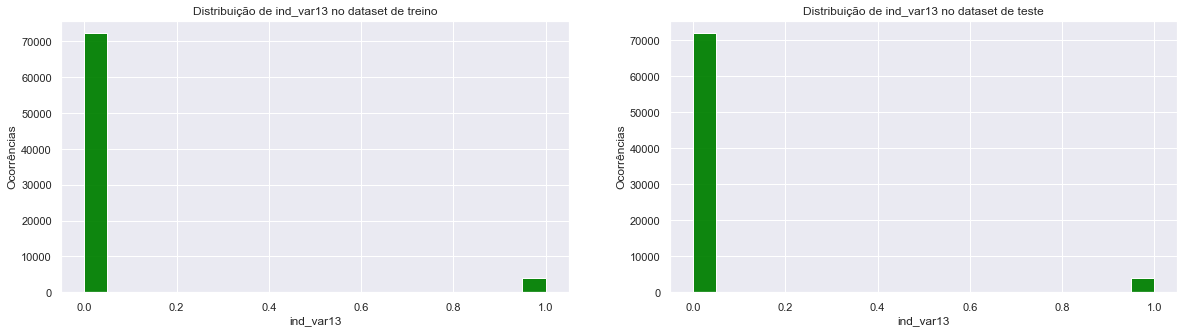

In [124]:
# Histplot de ind_var13
histplot_duplo(col_6, df_treino, df_teste)

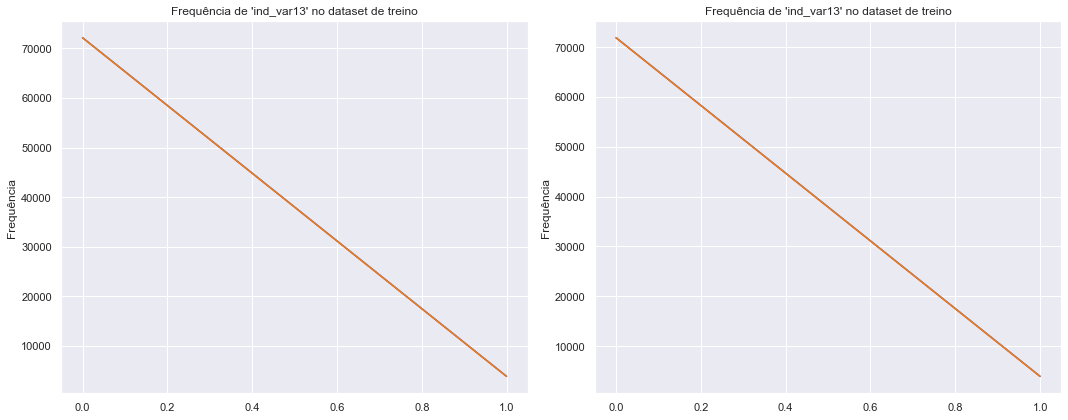

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'ind_var13' no dataset de treino:
Valor	 Frequencia%
0    94.914496
1     5.085504
Name: ind_var13, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'ind_var13' no dataset de treino:
Valor	 Frequencia%
0    94.914496
1     5.085504
Name: ind_var13, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'ind_var13' no dataset de teste:
Valor	 Frequencia%
0    94.812577
1     5.187423
Name: ind_var13, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'ind_var13' no dataset de teste:
Valor	 Frequencia%
0    94.812577
1     5.187423
Name: 

In [125]:
# Frequencias de ind_var13
valuecounts_duplo(col_6, df_treino, df_teste)

Pela análise acima, há apenas valores 0 e 1 para a variável ind_var13, ou seja, trata-se de uma variável categórica com maior predominância do valor 0 em ambos os datasets (treino e teste).

In [126]:
# Analisando cada variável com código ind
for elemento in codigo_ind_lista:
    print("%s \t\t unique-values:%i \t\t dtype:%s"%(elemento,df_treino[elemento].nunique(),df_treino[elemento].dtype))

ind_var1_0 		 unique-values:2 		 dtype:int64
ind_var5_0 		 unique-values:2 		 dtype:int64
ind_var5 		 unique-values:2 		 dtype:int64
ind_var8_0 		 unique-values:2 		 dtype:int64
ind_var8 		 unique-values:2 		 dtype:int64
ind_var12_0 		 unique-values:2 		 dtype:int64
ind_var12 		 unique-values:2 		 dtype:int64
ind_var13_0 		 unique-values:2 		 dtype:int64
ind_var13_corto_0 		 unique-values:2 		 dtype:int64
ind_var13_corto 		 unique-values:2 		 dtype:int64
ind_var13_largo_0 		 unique-values:2 		 dtype:int64
ind_var13 		 unique-values:2 		 dtype:int64
ind_var14_0 		 unique-values:2 		 dtype:int64
ind_var24_0 		 unique-values:2 		 dtype:int64
ind_var24 		 unique-values:2 		 dtype:int64
ind_var25_cte 		 unique-values:2 		 dtype:int64
ind_var26_0 		 unique-values:2 		 dtype:int64
ind_var26_cte 		 unique-values:2 		 dtype:int64
ind_var25_0 		 unique-values:2 		 dtype:int64
ind_var30_0 		 unique-values:2 		 dtype:int64
ind_var30 		 unique-values:2 		 dtype:int64
ind_var37_cte 		 unique-values:

<font color = 'DarkBlue'>**Conclusão para variáveis do código ind:**</font> Todas as variáveis do código ind são do tipo int64 e apresentam apenas 2 valores. Isso indica que trata-se de variáveis categóricas.

<b> Código num</b>

In [127]:
# Obtendo a lista com todas as variáveis num
codigo_num_lista = [coluna for coluna in df_treino.columns if 'num' in coluna]
print('As variáveis com código "num" são: ')


print('')
for i in codigo_num_lista:
    print(i)

print(50*'-')
print(f'Existem {len(codigo_num_lista)} variáveis com código "num"')

As variáveis com código "num" são: 

num_var1_0
num_var4
num_var5_0
num_var5
num_var8_0
num_var8
num_var12_0
num_var12
num_var13_0
num_var13_corto_0
num_var13_corto
num_var13_largo_0
num_var13
num_var14_0
num_var24_0
num_var24
num_var26_0
num_var25_0
num_op_var41_hace2
num_op_var41_hace3
num_op_var41_ult1
num_op_var41_ult3
num_op_var39_hace2
num_op_var39_hace3
num_op_var39_ult1
num_op_var39_ult3
num_var30_0
num_var30
num_var35
num_var37_med_ult2
num_var37_0
num_var39_0
num_var40_0
num_var41_0
num_var42_0
num_var42
num_aport_var13_hace3
num_ent_var16_ult1
num_var22_hace2
num_var22_hace3
num_var22_ult1
num_var22_ult3
num_med_var22_ult3
num_med_var45_ult3
num_meses_var5_ult3
num_meses_var8_ult3
num_meses_var12_ult3
num_meses_var13_corto_ult3
num_meses_var39_vig_ult3
num_op_var39_comer_ult1
num_op_var39_comer_ult3
num_op_var41_comer_ult1
num_op_var41_comer_ult3
num_op_var41_efect_ult1
num_op_var41_efect_ult3
num_op_var39_efect_ult1
num_op_var39_efect_ult3
num_var43_emit_ult1
num_var43_reci

In [128]:
# Gerando valores randomicos
random.seed(a=82)
codigo_num = random.sample(codigo_num_lista,2)
print(f'As variáveis num escolhidas aleatoriamente foram "{codigo_num[0]}" e "{codigo_num[1]}"')

As variáveis num escolhidas aleatoriamente foram "num_op_var41_hace2" e "num_var45_ult1"


<font Color = 'DarkBlue'><b>num_op_var41_hace2</b></font>

In [129]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável no dataset de treino é "{codigo_num[0]}" é {df_treino[codigo_num[0]].min()} \
e seu valor máximo é {df_treino[codigo_num[0]].max()}')

print(f'O valor mínimo da variável no dataset de teste é "{codigo_num[0]}" é {df_teste[codigo_num[0]].min()} \
e seu valor máximo é {df_teste[codigo_num[0]].max()}')

O valor mínimo da variável no dataset de treino é "num_op_var41_hace2" é 0 e seu valor máximo é 249
O valor mínimo da variável no dataset de teste é "num_op_var41_hace2" é 0 e seu valor máximo é 231


In [130]:
# Preparando a coluna para ser utilizada
col_7 = codigo_num[0]

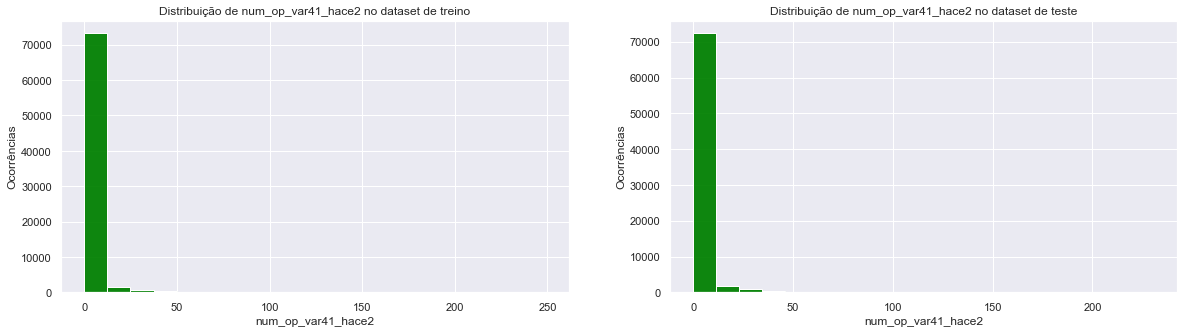

In [131]:
# Histplot
histplot_duplo(col_7, df_treino, df_teste)

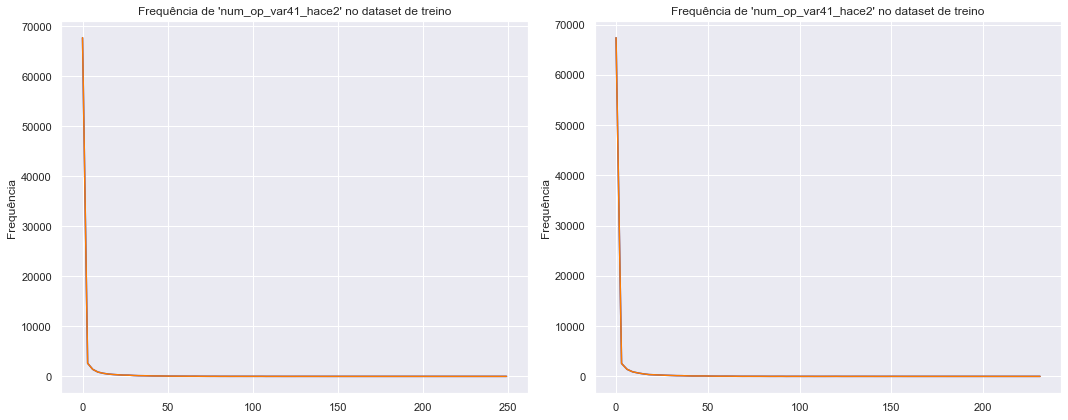

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'num_op_var41_hace2' no dataset de treino:
Valor	 Frequencia%
0     89.027887
3      3.442515
6      1.848198
9      1.137858
12     0.820837
Name: num_op_var41_hace2, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'num_op_var41_hace2' no dataset de treino:
Valor	 Frequencia%
162    0.001315
201    0.001315
123    0.001315
171    0.001315
186    0.001315
Name: num_op_var41_hace2, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'num_op_var41_hace2' no dataset de teste:
Valor	 Frequencia%
0     88.922156
3      3.391015
6      1.855760
9      1.200243
12     0.890290
Name: num_op_var41_hace2, dtype: float64
--------------------------

In [132]:
# Frequencia
valuecounts_duplo(col_7, df_treino, df_teste)

A análise do resumo acima nos faz crer que a variável num_op_var41_hace2 possa ser categórica. Vamos explorar essa possibilidade.

In [133]:
# Checando a quantidade de elementos.
print(f'A quantidade de elementos distintos na variável {col_7} no dataframe \
de treino é {len(df_treino[col_7].unique())} \ne no dataframe de teste é {len(df_teste[col_7].unique())}.')

A quantidade de elementos distintos na variável num_op_var41_hace2 no dataframe de treino é 51 
e no dataframe de teste é 56.


In [134]:
# Procurando algum padrão
np.array(sorted(df_treino[col_7].unique()))

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 114, 117,
       120, 123, 129, 144, 153, 156, 162, 165, 171, 186, 201, 249],
      dtype=int64)

Aparentemente todos os valores são múltiplos de 3. Vamos validar essa afirmação.

In [135]:
# Checando se todos os valores são múltiplos de 3

# Array com todos os valores
array_num = np.array(sorted(df_treino[col_7].unique()))

# Lista com True se o elemento for múltiplo de 3, False se não for
multiplo_3 = [True if (i%3 == 0) else False for i in array_num]

# Vendo se há algum elemento False na lista
if (False in multiplo_3 == True):
    print('Nem todos os elementos são múltiplos de 3.')

else:
    print('Todos os elementos são múltiplos de 3.')

Todos os elementos são múltiplos de 3.


<font Color = 'DarkBlue'><b>num_var45_ult1</b></font>

In [136]:
# Valores máximos e mínimos
print(f'O valor mínimo da variável no dataset de treino é "{codigo_num[1]}" é {df_treino[codigo_num[1]].min()} \
e seu valor máximo é {df_treino[codigo_num[1]].max()}')

print(f'O valor mínimo da variável no dataset de teste é "{codigo_num[0]}" é {df_teste[codigo_num[1]].min()} \
e seu valor máximo é {df_teste[codigo_num[1]].max()}')

O valor mínimo da variável no dataset de treino é "num_var45_ult1" é 0 e seu valor máximo é 510
O valor mínimo da variável no dataset de teste é "num_op_var41_hace2" é 0 e seu valor máximo é 402


In [137]:
# Preparando a variável de coluna para análise
col_8 = codigo_num[1]

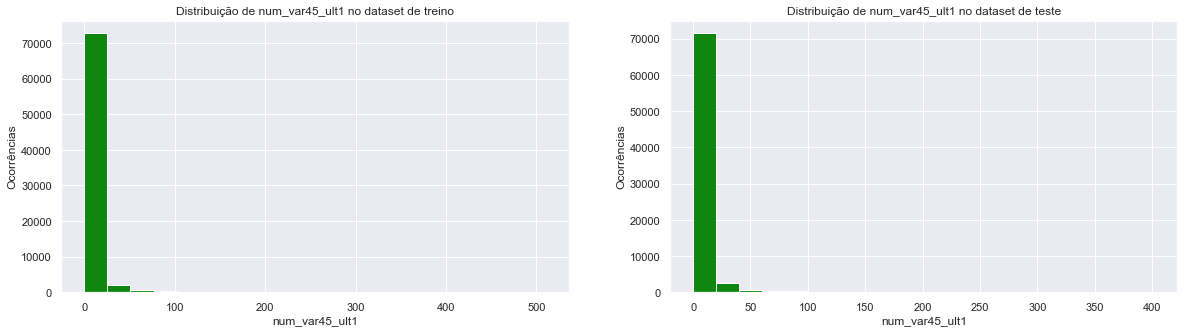

In [138]:
# Observando o histplot
histplot_duplo(col_8, df_treino, df_teste)

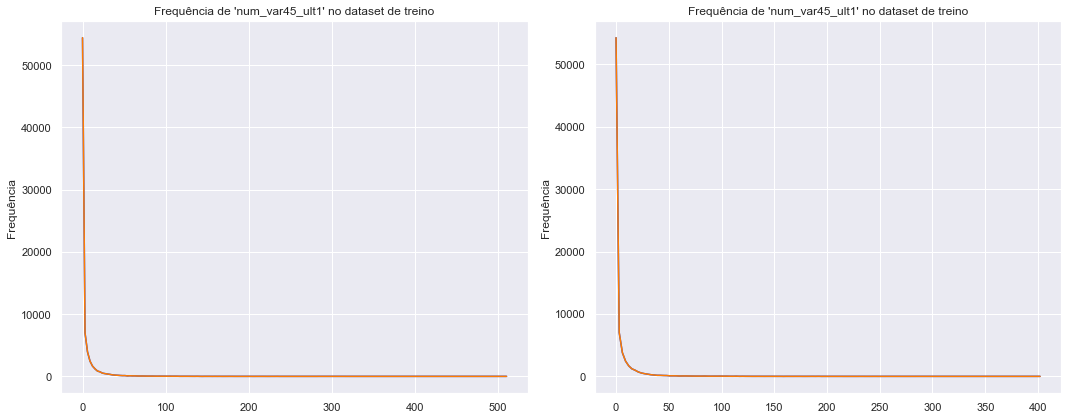

----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequências de 'num_var45_ult1' no dataset de treino:
Valor	 Frequencia%
0     71.549592
3      9.185741
6      5.161800
9      3.217574
12     2.174428
Name: num_var45_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 menores frequências de 'num_var45_ult1' no dataset de treino:
Valor	 Frequencia%
270    0.001315
240    0.001315
225    0.001315
279    0.001315
483    0.001315
Name: num_var45_ult1, dtype: float64
----------------------------------------------------------------------------------------------------
Porcentagem das 5 maiores frequencias de 'num_var45_ult1' no dataset de teste:
Valor	 Frequencia%
0     71.591179
3      9.261653
6      5.014640
9      3.234061
12     2.231660
Name: num_var45_ult1, dtype: float64
--------------------------------------------------

In [139]:
# Observando a frequencia
valuecounts_duplo(col_8, df_treino, df_teste)

Pelo mesmo motivo anterior, há forte indicação que a variável num_var45_ult1 possa ser categórica. Vamos prosseguir com a validação.

In [140]:
# Checando a quantidade de elementos.
print(f'A quantidade de elementos distintos na variável {col_8} no dataframe \
de treino é {len(df_treino[col_8].unique())} \ne no dataframe de teste é {len(df_teste[col_8].unique())}.')

A quantidade de elementos distintos na variável num_var45_ult1 no dataframe de treino é 94 
e no dataframe de teste é 91.


In [141]:
# Procurando algum padrão
np.array(sorted(df_treino[col_8].unique()))

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 174, 177, 180, 183, 186, 189, 192, 195,
       198, 201, 204, 207, 210, 213, 216, 222, 225, 228, 231, 234, 237,
       240, 255, 261, 264, 267, 270, 279, 282, 285, 306, 321, 375, 393,
       417, 483, 510], dtype=int64)

Novamente os valores parecem ser múltiplos de 3. Vamos validar.

In [142]:
# Checando se todos os valores são múltiplos de 3

# Array com todos os valores
array_num_2 = np.array(sorted(df_treino[col_8].unique()))

# Lista com True se o elemento for múltiplo de 3, False se não for
multiplo_3_2 = [True if (i%3 == 0) else False for i in array_num_2]

# Vendo se há algum elemento False na lista
if (False in multiplo_3_2 == True):
    print('Nem todos os elementos são múltiplos de 3.')

else:
    print('Todos os elementos são múltiplos de 3.')

Todos os elementos são múltiplos de 3.


Todos os valores são múltiplos de 3, o que combinado com a quantidade de valores valida a suposição que a variável num_var45_ult1 é categórica.

In [143]:
# Analisando cada variável com código num
for elemento in codigo_num_lista:
    print("%s \t\t unique-values:%i \t\t dtype:%s"%(elemento,df_treino[elemento].nunique(),df_treino[elemento].dtype))

num_var1_0 		 unique-values:3 		 dtype:int64
num_var4 		 unique-values:8 		 dtype:int64
num_var5_0 		 unique-values:5 		 dtype:int64
num_var5 		 unique-values:5 		 dtype:int64
num_var8_0 		 unique-values:3 		 dtype:int64
num_var8 		 unique-values:2 		 dtype:int64
num_var12_0 		 unique-values:6 		 dtype:int64
num_var12 		 unique-values:4 		 dtype:int64
num_var13_0 		 unique-values:7 		 dtype:int64
num_var13_corto_0 		 unique-values:3 		 dtype:int64
num_var13_corto 		 unique-values:3 		 dtype:int64
num_var13_largo_0 		 unique-values:7 		 dtype:int64
num_var13 		 unique-values:7 		 dtype:int64
num_var14_0 		 unique-values:5 		 dtype:int64
num_var24_0 		 unique-values:4 		 dtype:int64
num_var24 		 unique-values:3 		 dtype:int64
num_var26_0 		 unique-values:9 		 dtype:int64
num_var25_0 		 unique-values:9 		 dtype:int64
num_op_var41_hace2 		 unique-values:51 		 dtype:int64
num_op_var41_hace3 		 unique-values:22 		 dtype:int64
num_op_var41_ult1 		 unique-values:68 		 dtype:int64
num_op_var41_

<font color = 'DarkBlue'>**Conclusão para as variáveis do código num:**</font> A quantidade de valores e o fato de todos serem múltiplos de 3 nos dois casos analisados indica que as variáveis do código "num" são categóricas.

<b>Outras variáveis</b>

In [144]:
# Obtendo uma lista com todas as variáveis contendo código
variaveis_codigo = codigo_imp_lista + codigo_ind_lista + codigo_num_lista + codigo_saldo_lista
variaveis_codigo

['imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_aport_var13_hace3',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1',
 'ind_var1_0',
 'ind_var5_0',
 'ind_var5',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13',
 'ind_var14_0',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var25_0',
 'ind_var30_0',
 'ind_var30',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var39_0',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'ind_var43_emit_ult1',
 'ind_var43_recib_ult1',
 'num_var1_0',
 'num_var4',
 'num_var5_0',
 'num_var5',
 'num_var8_0',
 'num_var8',

In [145]:
# Obtendo uma lista com todas as variáveis restantes
variaveis_restantes = list(df_treino.drop(variaveis_codigo, axis = 1).columns)
variaveis_restantes

['ID', 'var3', 'var15', 'var36', 'var21', 'var38', 'TARGET']

In [146]:
# Removendo as variáveis ID e TARGET da lista
variaveis_restantes.remove('ID')
variaveis_restantes.remove('TARGET')
variaveis_restantes

['var3', 'var15', 'var36', 'var21', 'var38']

In [147]:
# Analisando cada variável com var
for elemento in variaveis_restantes:
    print("%s \t\t unique-values:%i \t\t dtype:%s"%(elemento,df_treino[elemento].nunique(),df_treino[elemento].dtype))

var3 		 unique-values:207 		 dtype:int64
var15 		 unique-values:100 		 dtype:int64
var36 		 unique-values:5 		 dtype:int64
var21 		 unique-values:24 		 dtype:int64
var38 		 unique-values:57736 		 dtype:float64


<font color = 'DarkBlue'>**Conclusão para as outras variáveis:**</font> As variáveis var3, var15, var36 e var21 são categóricas de acordo com seu tipo (int64) e quantidade de valores únicos. Já a variável var38 é numérica.

## Outliers
Outliers são valores atípicos, ou seja, que fogem do padrão apresentado pelos dados. Um dos métodos utilizados para determinar outliers é o do Score Z, onde é considerado outlier o valor que se encontra desviado da média por uma quantidade de 3 desvios padrão.
<br>
<br>
Para considerar que um valor realmente é um outlier, é necessário ter conhecimento de negócio e da variável envolvida para poder fazer o julgamento. Como as variáveis presentes são anônimas, vamos considerar para o tratamento a definição de outlier: um valor que está fora dos padrões. Dessa forma, os registros identificados com outliers serão removidos.


In [148]:
# Separando as variáveis entre categóricas e numéricas
# Categóricas
cats = codigo_ind_lista + codigo_num_lista
cats.extend(['var3', 'var15', 'var36', 'var21'])

# Numéricas
numericas = codigo_imp_lista + codigo_saldo_lista
numericas.append('var38')

# # Essas variáveis serão importantes na engenharia de atributos. Vamos salvá-las em disco
# with open('pickle_files/var_cats.pkl', 'wb') as pickle_file:
#       joblib.dump(cats, 'pickle_files/var_cats.pkl')
    
# with open('pickle_files/var_numericas.pkl', 'wb') as pickle_file:
#       joblib.dump(numericas, 'pickle_files/var_numericas.pkl')

In [149]:
# Obtendo o DataFrame com as variáveis numéricas
variaveis = df_treino.drop(['ID','TARGET'], axis = 1)
variaveis = variaveis.drop(cats, axis = 1)
variaveis

,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,10.576564
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,300.0,122.22,300.0,240.75,10.805234
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.117417
3,0.0,195.0,195.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.066763
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,11.672584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.017423
76016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15498.42,0.0,48175.62,31837.02,0.0,0.00,0.0,0.00,11.683803
76017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.212201
76018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.341878


In [150]:
# Obtendo a lista de outliers
lista_outliers = variaveis.apply(lambda x: outliers_z_score(x))
lista_outliers

,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38
0,"[939, 1345, 1568, 1787, 2170, 2745, 2760, 3107...","[25, 114, 119, 258, 399, 457, 514, 530, 568, 7...","[14, 25, 114, 119, 127, 165, 212, 258, 299, 30...","[14, 25, 114, 119, 258, 399, 457, 514, 530, 56...","[14, 25, 114, 119, 165, 212, 258, 299, 305, 34...","[93, 262, 419, 457, 514, 603, 813, 840, 1007, ...","[262, 457, 514, 530, 1007, 1269, 1377, 1403, 1...","[119, 262, 419, 457, 514, 530, 568, 779, 813, ...","[93, 262, 419, 457, 514, 603, 813, 840, 1007, ...","[262, 457, 514, 530, 1007, 1269, 1286, 1377, 1...",...,"[25, 235, 348, 603, 1156, 1549, 1787, 1814, 18...","[135, 207, 209, 339, 341, 348, 383, 400, 423, ...","[209, 279, 383, 386, 668, 1173, 1254, 1283, 13...","[135, 209, 339, 348, 383, 400, 423, 578, 668, ...","[13, 135, 209, 339, 348, 383, 400, 423, 578, 6...","[83, 104, 134, 149, 217, 297, 374, 464, 534, 5...","[83, 104, 134, 149, 374, 534, 539, 765, 985, 1...","[83, 104, 134, 149, 217, 297, 352, 374, 376, 4...","[83, 104, 134, 149, 217, 297, 352, 374, 376, 4...","[206, 386, 424, 445, 447, 693, 913, 922, 958, ..."


In [151]:
# Obtendo um DataFrame com os outliers
df_outliers = lista_outliers.iloc[0]
df_outliers = pd.DataFrame(df_outliers)
df_outliers.columns = ['linhas_outliers']
df_outliers

,linhas_outliers
imp_ent_var16_ult1,"[939, 1345, 1568, 1787, 2170, 2745, 2760, 3107..."
imp_op_var39_comer_ult1,"[25, 114, 119, 258, 399, 457, 514, 530, 568, 7..."
imp_op_var39_comer_ult3,"[14, 25, 114, 119, 127, 165, 212, 258, 299, 30..."
imp_op_var41_comer_ult1,"[14, 25, 114, 119, 258, 399, 457, 514, 530, 56..."
imp_op_var41_comer_ult3,"[14, 25, 114, 119, 165, 212, 258, 299, 305, 34..."
imp_op_var41_efect_ult1,"[93, 262, 419, 457, 514, 603, 813, 840, 1007, ..."
imp_op_var41_efect_ult3,"[262, 457, 514, 530, 1007, 1269, 1377, 1403, 1..."
imp_op_var41_ult1,"[119, 262, 419, 457, 514, 530, 568, 779, 813, ..."
imp_op_var39_efect_ult1,"[93, 262, 419, 457, 514, 603, 813, 840, 1007, ..."
imp_op_var39_efect_ult3,"[262, 457, 514, 530, 1007, 1269, 1286, 1377, 1..."


In [152]:
# Lista com as linhas dos outliers
outliers_lista_final = df_outliers['linhas_outliers'].to_numpy()
outliers_lista_final

array([array([  939,  1345,  1568,  1787,  2170,  2745,  2760,  3107,  3360,
               3808,  3933,  4049,  4656,  4791,  4793,  5431,  5557,  5621,
               5748,  5878,  5902,  5914,  6996,  7134,  7647,  7822,  8098,
               8869,  9036,  9091,  9167,  9251,  9470,  9486,  9492,  9886,
              10758, 11238, 12054, 12842, 13064, 13305, 13308, 13384, 13603,
              14234, 15197, 15563, 15641, 15683, 15756, 16096, 16220, 16709,
              16755, 16991, 17370, 17770, 18064, 18916, 19019, 19060, 19753,
              20102, 20646, 21177, 21247, 22338, 23379, 23518, 23912, 24005,
              24006, 24513, 24851, 25364, 25986, 26396, 27073, 27218, 27314,
              27868, 28400, 28753, 29005, 29216, 29291, 29300, 29714, 29889,
              29935, 29947, 30401, 30455, 30466, 30554, 30912, 31197, 31695,
              31941, 32205, 32296, 33066, 33357, 33728, 34068, 34119, 34217,
              34447, 34790, 35471, 35729, 35801, 36022, 36111, 36820, 36834,

In [153]:
# Ajustando a dimensão
outliers_lista_final = np.concatenate(outliers_lista_final, axis=0 )
outliers_lista_final

array([  939,  1345,  1568, ..., 75766, 75822, 75961], dtype=int64)

In [154]:
# Filtrando as linhas para excluir
filtrar_linhas = df_treino.index.isin(outliers_lista_final)

In [155]:
# Visualizando
filtrar_linhas

array([False, False, False, ..., False, False, False])

In [156]:
# Removendo os outliers
df_treino_sem_outliers = df_treino[~filtrar_linhas].reset_index()

In [157]:
# Visualizando
df_treino_sem_outliers.drop('index', axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,10.576564,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,300.0,122.22,300.0,240.75,10.805234,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.117417,0
3,8,2,37,0.0,195.0,195.0,195.0,195.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.066763,0
4,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.384816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67786,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.017423,0
67787,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15498.42,0.0,48175.62,31837.02,0.0,0.00,0.0,0.00,11.683803,0
67788,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.212201,0
67789,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,11.341878,0


In [158]:
# Vendo quantas linhas foram excluídas
print(f'Foram excluídas {df_treino.shape[0] - df_treino_sem_outliers.shape[0]} linhas.')

Foram excluídas 8229 linhas.


In [159]:
# # Salvando em disco
# df_treino_sem_outliers.to_pickle('pickle_files/df_treino_sem_outliers.pkl')
# df_teste.to_pickle('pickle_files/df_teste.pkl')